## Descripción de la base de datos B
**Name:** Bank Marketing

**Website:** https://archive.ics.uci.edu/ml/datasets/bank+marketing

**Description:** The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

P.S. The data was modified by adding some missing values.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
bank_url = 'https://raw.githubusercontent.com/analiticaycienciadatosudea/EstadisticaExploracionDatos/main/bank-full.csv'

In [ ]:
# Se lee y guarda la base de datos de tipo csv en la variabel df y se muestra 10 muestras aleatorias de los datos
df = pd.read_csv(bank_url, header=0, sep=',')
df.sample (10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
15908,50,management,married,tertiary,no,4315,yes,no,cellular,22,jul,181,11,-1,0,unknown,no
5960,32,technician,married,secondary,?,782,yes,no,unknown,26,may,116,4,-1,0,unknown,no
26665,34,management,single,tertiary,no,11350,yes,no,cellular,20,nov,159,1,-1,0,unknown,no
37055,36,blue-collar,single,secondary,no,478,yes,no,cellular,?,may,610,1,-1,0,unknown,yes
21914,32,technician,?,secondary,no,-22,yes,no,cellular,20,aug,215,2,-1,0,unknown,no
11358,50,blue-collar,married,secondary,no,5,no,?,unknown,19,jun,170,7,-1,0,?,no
25727,43,blue-collar,married,secondary,no,1927,?,no,cellular,19,nov,63,1,-1,0,unknown,no
28719,32,admin.,single,secondary,no,1630,yes,no,?,30,jan,?,1,-1,0,unknown,no
1854,37,technician,married,secondary,no,277,yes,no,unknown,9,may,251,2,-1,0,unknown,no
43000,42,blue-collar,married,secondary,no,413,yes,no,cellular,11,feb,456,2,184,2,success,yes


## Exploración inicial de los datos

En este apartado, se debe cargar la base de datos y generar una exploración inicial, determinando si hay datos faltantes o no y generando un reporte de las estadísticas principales como la media, la desviación estándar, los cuartiles y los valores máximos y mínimos de cada variable.

In [ ]:
# Registros y carcaterísticas
df.shape

(45211, 17)

In [ ]:
# Información general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        42997 non-null  float64 
 1   balance    42912 non-null  float64 
 2   day        42956 non-null  float64 
 3   duration   42939 non-null  float64 
 4   campaign   42907 non-null  float64 
 5   pdays      42932 non-null  float64 
 6   previous   42922 non-null  float64 
 7   job        45211 non-null  category
 8   marital    45211 non-null  category
 9   education  45211 non-null  category
 10  default    45211 non-null  category
 11  housing    45211 non-null  category
 12  loan       45211 non-null  category
 13  contact    45211 non-null  category
 14  month      45211 non-null  category
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), float64(7)
memory usage: 2.8 MB


Para poder continuar en la exploración, creamos dos DataFrame: uno con las variables categóricas y otro con las cuantitativas

In [ ]:
# Se crear una variable df_categoricas donde se almacenar las variables categoricas del dataframe original
df_categoricas = df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']]

# Se crear una variable df_cuantitativa donde se almacenar las variables cuantivativas del dataframe original
df_cuantitativa = df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]

### Exploración de variables categoricas

In [ ]:
# Se reemplaza los valores '?' por la categoria 'nothing'
df_categoricas = df_categoricas.replace('?', 'nothing')

# Se reemplaza los valores 'unknown' por la categoria 'nothing' en dos columnas
df_categoricas[['contact', 'poutcome']] = df_categoricas[['contact', 'poutcome']].replace('unknown', 'nothing')

# Se convierten las variables de tipo 'object' a 'category' por su baja cardinalidad (???)
for nombre_columna in df_categoricas.columns:
  df_categoricas [nombre_columna] = df_categoricas[nombre_columna].astype('category')

print(df_categoricas.dtypes)
print('*'*50)
df_categoricas.head()

job          category
marital      category
education    category
default      category
housing      category
loan         category
contact      category
month        category
poutcome     category
y            category
dtype: object
**************************************************


,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,nothing,may,nothing,no
1,technician,single,secondary,no,nothing,no,nothing,may,nothing,nothing
2,entrepreneur,married,nothing,no,yes,yes,nothing,nothing,nothing,no
3,blue-collar,nothing,unknown,no,yes,no,nothing,may,nothing,no
4,nothing,single,unknown,no,no,no,nothing,may,nothing,no


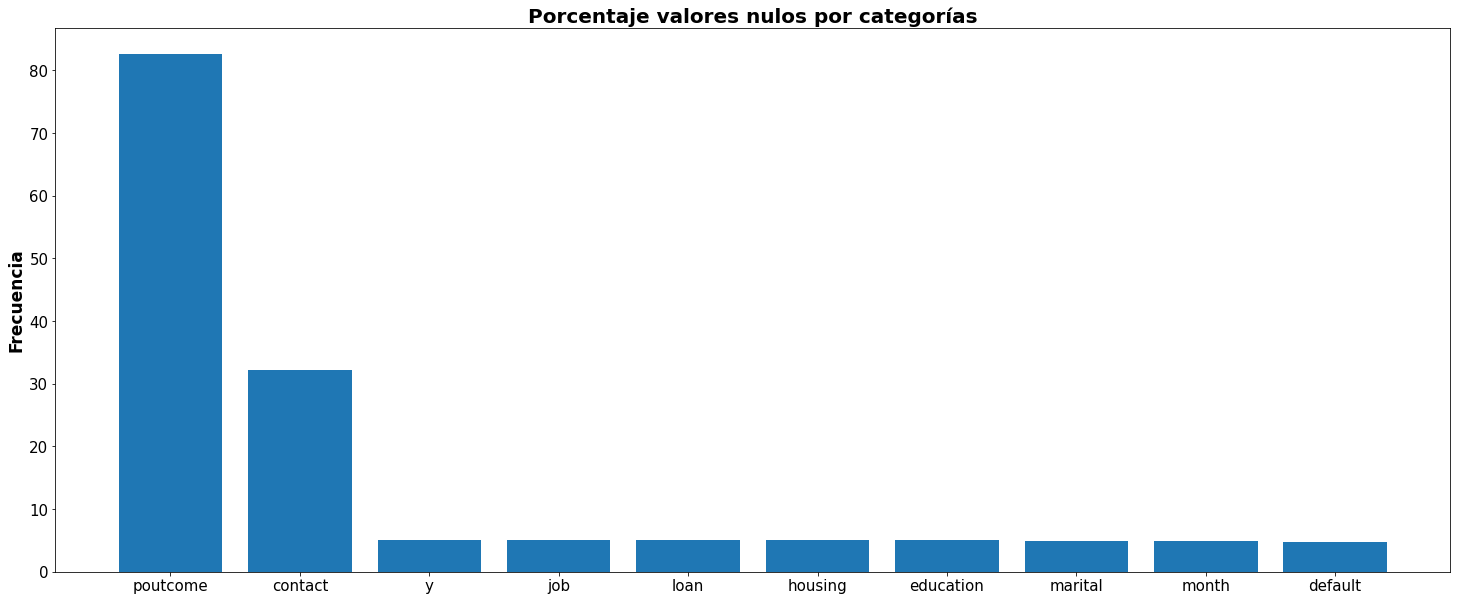

In [ ]:
# Se crea un diccionario donde se muestra la cantidad de datos nulos ordenados de mayor a menor por las variables que mas tienen
dicc = {}
porcentaje_nulos = {}

for i in df_categoricas.columns:
  dicc[i] = df_categoricas[i].value_counts()['nothing']
  porcentaje_nulos [i] = 100*(df_categoricas[i].value_counts()['nothing']/df_categoricas[i].value_counts().sum())

# Se ordena el diccionario de manera descendente
porcentaje_nulos = dict(sorted(porcentaje_nulos.items(), key=lambda x: x[1], reverse=True))

# Se grafica los datos nulos por categoría en un diagrama de barras

plt.figure(figsize=(25, 10))
plt.bar(porcentaje_nulos.keys(), porcentaje_nulos.values())
plt.title('Porcentaje valores nulos por categorías', fontsize = 20, fontweight='bold')
plt.ylabel('Frecuencia', fontsize = 17, fontweight='bold')
plt.yticks(rotation=0, fontsize = 15)
plt.xticks(rotation=0, fontsize = 15)
plt.show()


In [ ]:
porcentaje_nulos


{'poutcome': 82.6015792616841,
 'contact': 32.25100086262193,
 'y': 5.127070845590675,
 'job': 5.10274048351065,
 'loan': 5.047444206056048,
 'housing': 5.018690141779655,
 'education': 5.016478290681471,
 'marital': 4.932427948950477,
 'month': 4.894826480281347,
 'default': 4.731149499015727}

In [ ]:
# Se grafica la distribuión de las categorias para cada variable
for i in df_categoricas.columns:

  # Se convierte a porcentaje la frecuencia de cada categoría por variable
  df_aux = dict(100 * df_categoricas[i].value_counts()/len(df_categoricas[i]))

  plt.figure(figsize=(25, 10))
  plt.bar(df_aux.keys(), df_aux.values(), color = ['#EC7063' if i == 'nothing' else '#2E86C1' for i in df_aux.keys()])
  plt.title(f'Porcentaje de datos de las categorias de la variable {i}', fontsize = 16)
  plt.xlabel(f'Categorias de la variable {i}', fontsize = 13)
  plt.xticks(fontsize = 12, rotation = 0)
  plt.ylabel('%', fontsize = 13)
  plt.yticks(fontsize = 12)
  plt.show()

  print('\n')

### Exploración de variables cuantivativas

In [ ]:
# Se reemplaza los valores '?' por el valor np.nan
df_cuantitativa = df_cuantitativa.replace('?', np.nan)

df_cuantitativa = df_cuantitativa.astype('float')

In [ ]:
df_cuantitativa.head(5)

,age,balance,day,duration,campaign,pdays,previous
0,58.0,2143.0,5.0,261.0,1.0,-1.0,0.0
1,44.0,29.0,5.0,151.0,1.0,NaN,0.0
2,NaN,2.0,5.0,76.0,1.0,NaN,0.0
3,47.0,1506.0,5.0,92.0,1.0,-1.0,NaN
4,33.0,1.0,5.0,198.0,1.0,-1.0,0.0


In [ ]:
df_cuantitativa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       42997 non-null  float64
 1   balance   42912 non-null  float64
 2   day       42956 non-null  float64
 3   duration  42939 non-null  float64
 4   campaign  42907 non-null  float64
 5   pdays     42932 non-null  float64
 6   previous  42922 non-null  float64
dtypes: float64(7)
memory usage: 2.4 MB


In [ ]:
# Se crea un diccionario donde se muestra la cantidad de datos nulos ordenados de mayor a menor por las variables que mas tienen
diccionario_datos_faltantes_cuantitativas = dict(df_cuantitativa.isnull().sum())
diccionario_datos_faltantes_cuantitativas = dict(sorted(diccionario_datos_faltantes_cuantitativas.items(), key=lambda x: x[1], reverse=True))

print(diccionario_datos_faltantes_cuantitativas)

{'campaign': 2304, 'balance': 2299, 'previous': 2289, 'pdays': 2279, 'duration': 2272, 'day': 2255, 'age': 2214}


In [ ]:
# Se muestran las estadisticas basicas de las variables cuantitativas
df_cuantitativa.describe()

,age,balance,day,duration,campaign,pdays,previous
count,42997.000000,42912.000000,42956.000000,42939.000000,42907.000000,42932.000000,42922.000000
mean,40.933065,1357.170512,15.802798,258.129533,2.764048,40.264045,0.579190
std,10.622861,3020.291869,8.322404,257.922218,3.100897,100.193597,2.313178
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,71.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,447.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1422.000000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


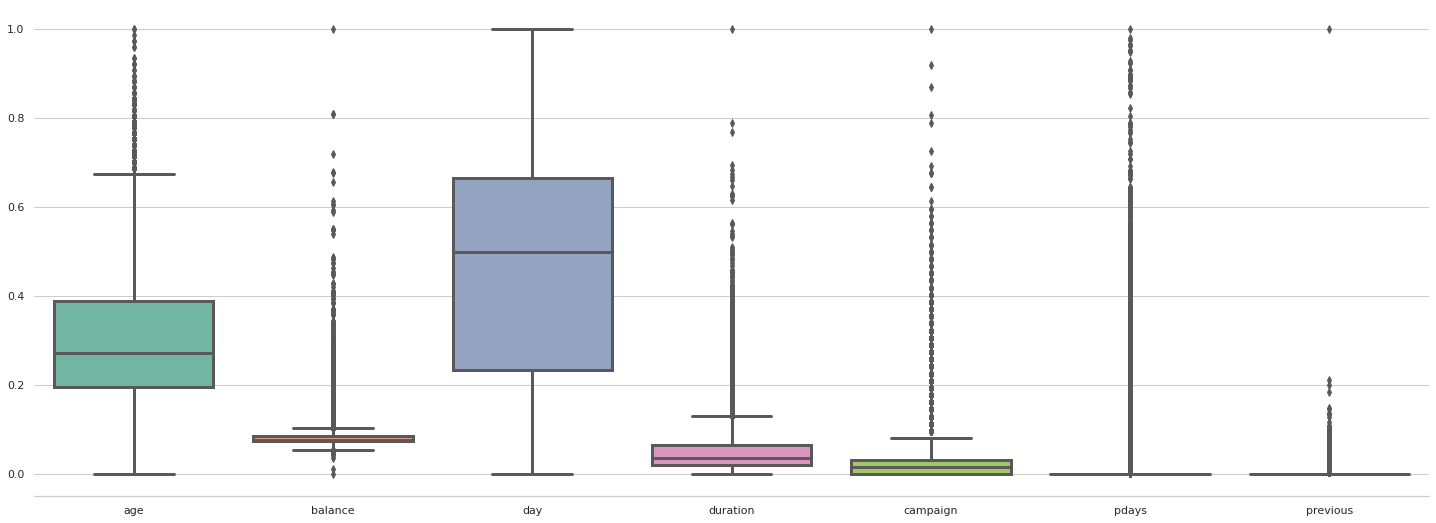

In [ ]:
# Se aplica la nornmalización, se utiliza cuando hay mucha diferencia en escalas
df_cuantitativo_normalizada = (df_cuantitativa - df_cuantitativa.min())/(df_cuantitativa.max() - df_cuantitativa.min()) 

# Se realiza el gráfico
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = df_cuantitativo_normalizada, linewidth = 3, 
            palette="Set2", fliersize = 5) # Diagrama Box Plot
sns.despine(left=True)

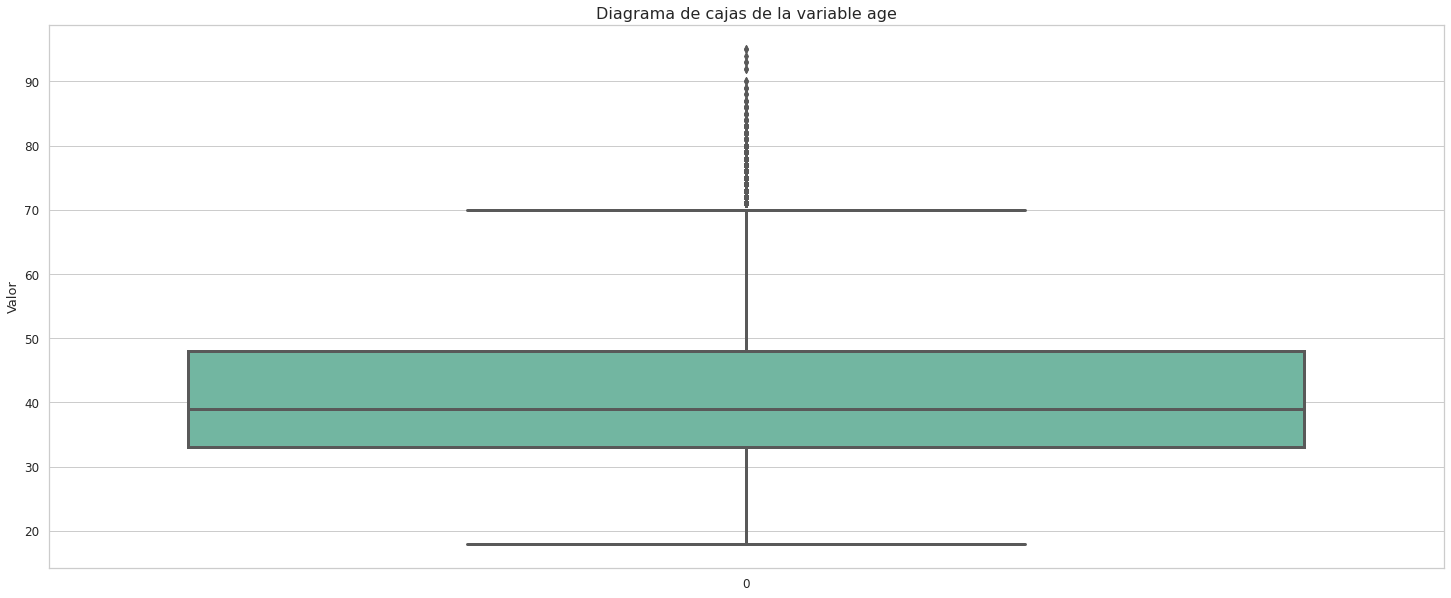

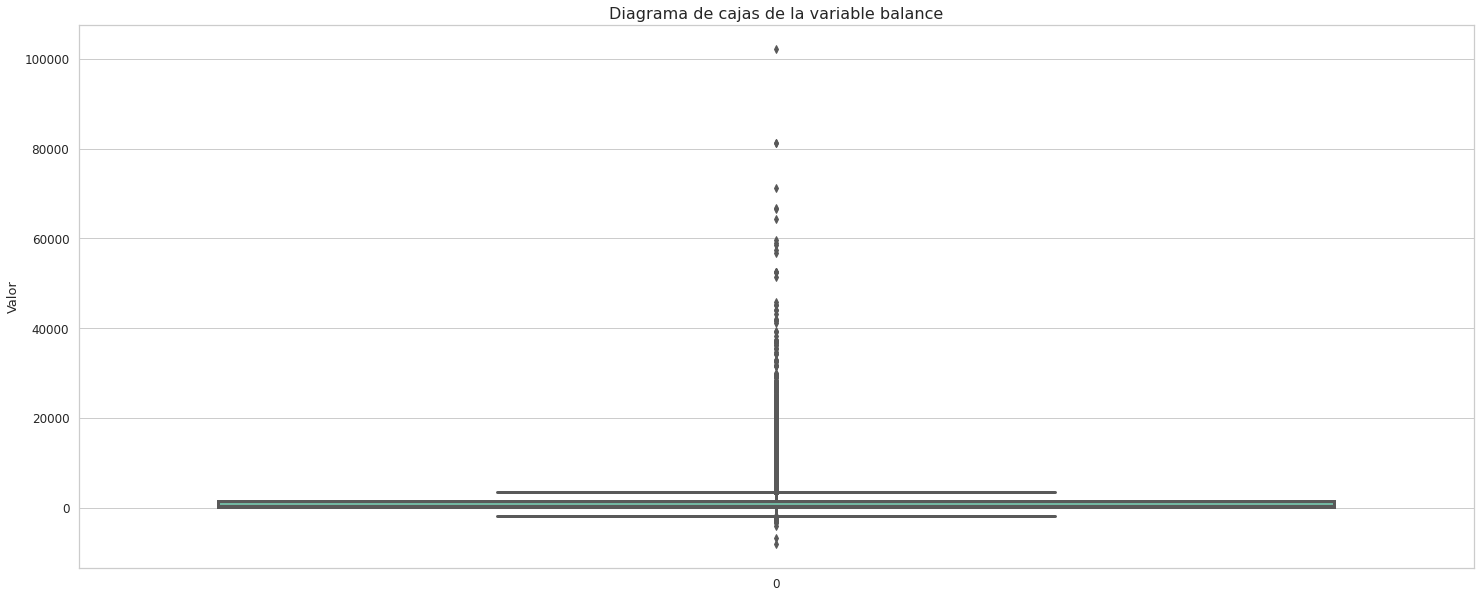

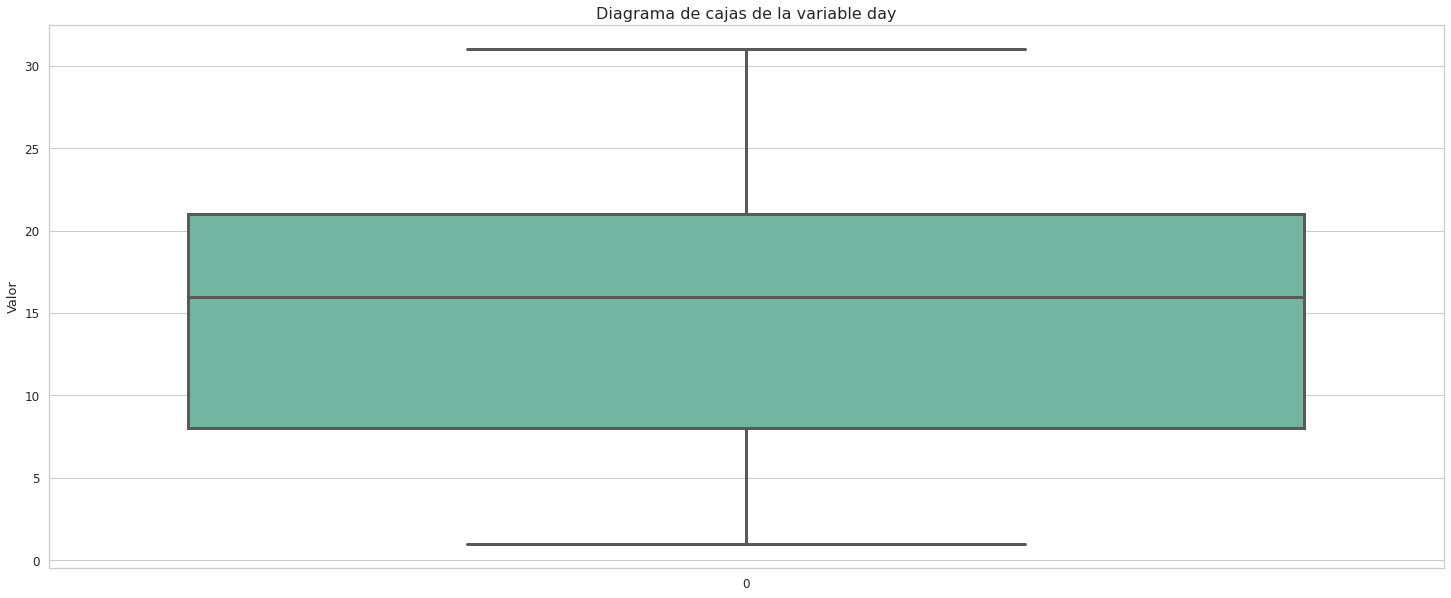

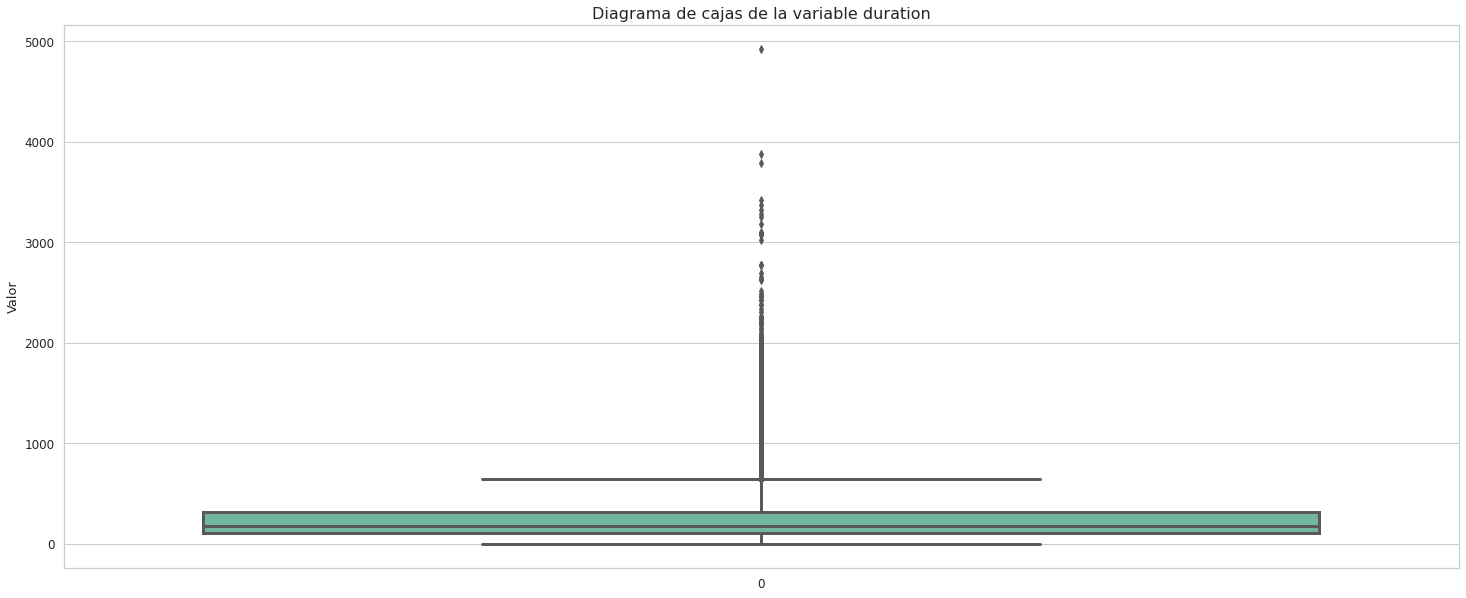

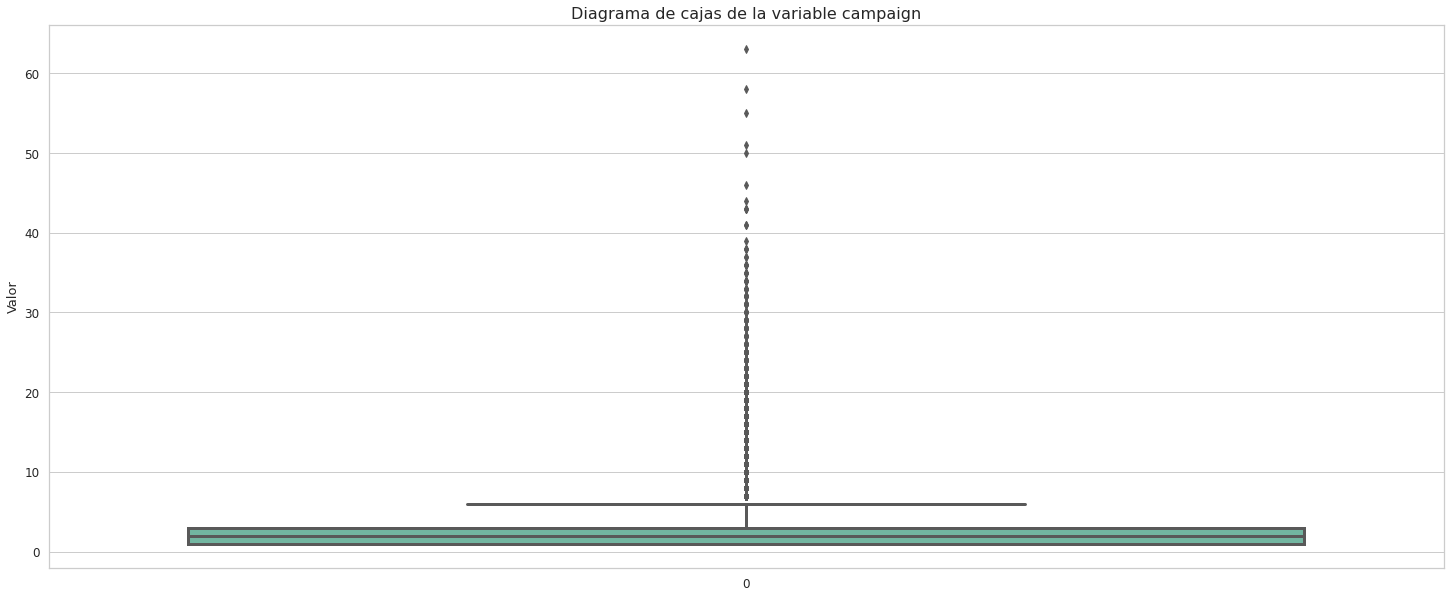

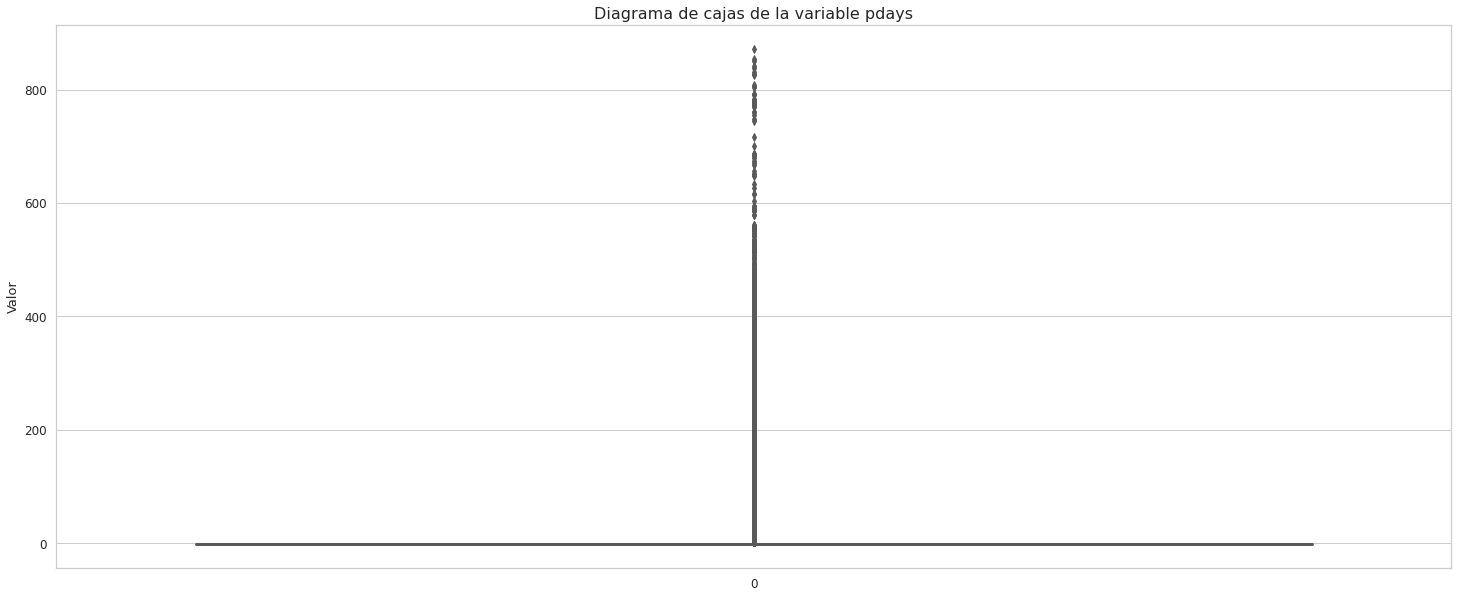

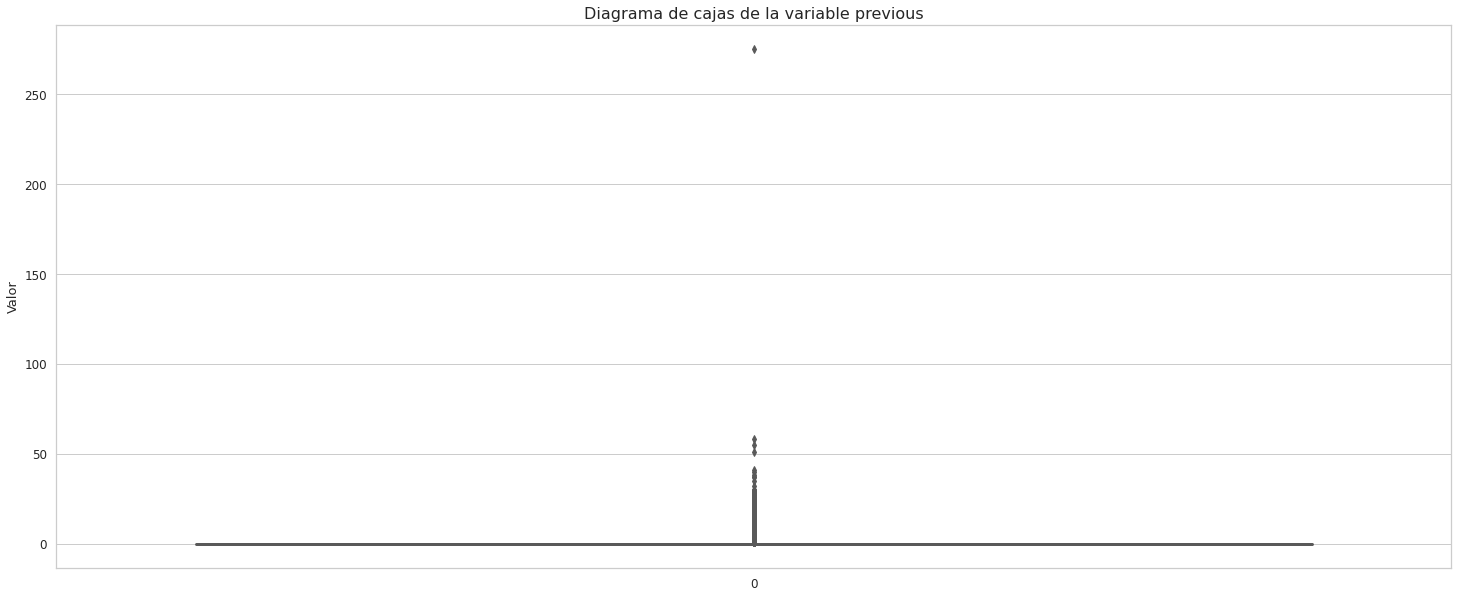

In [ ]:
# Se muestra el boxplot de las cada variable cuantitativa para analizarlos mejor
for i in df_cuantitativa.columns:
  plt.figure(figsize=(25, 10))
  sns.boxplot(data = df_cuantitativa[i], linewidth = 3, palette="Set2", fliersize = 5)
  plt.title(f'Diagrama de cajas de la variable {i}', fontsize = 16)
  plt.xticks(fontsize = 12, rotation = 0)
  plt.ylabel('Valor', fontsize = 13)
  plt.yticks(fontsize = 12)
  plt.show()
  print('\n')

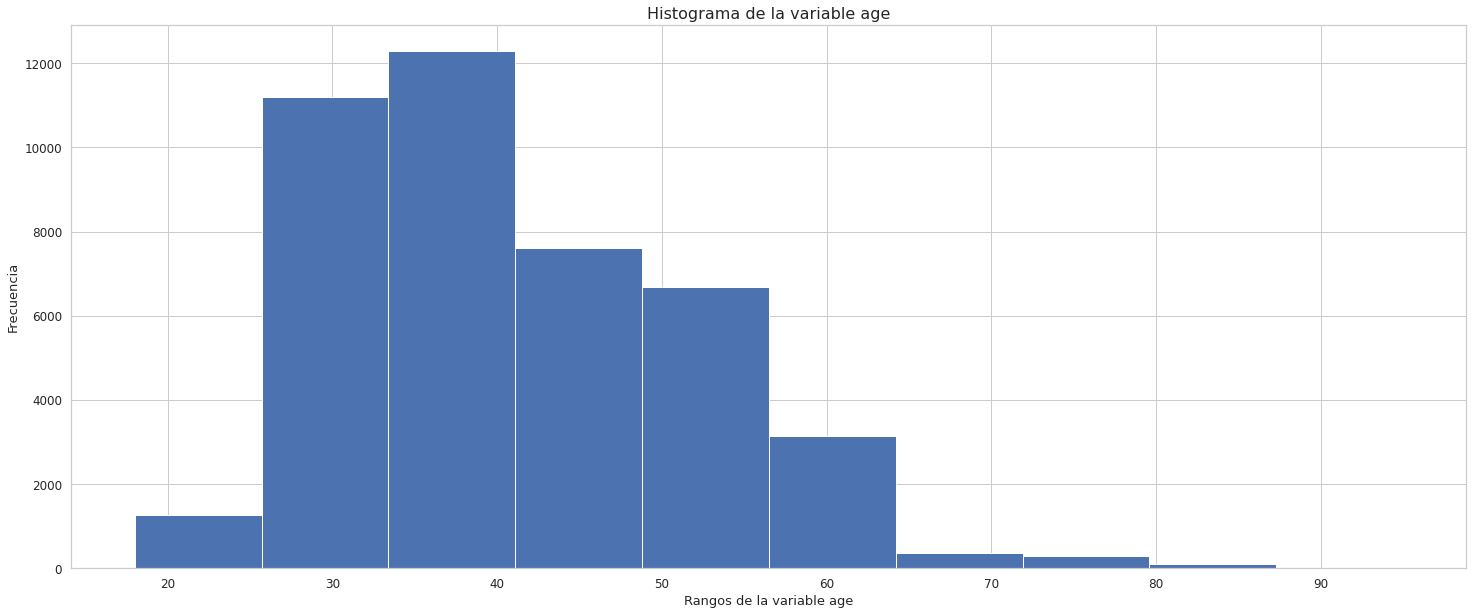

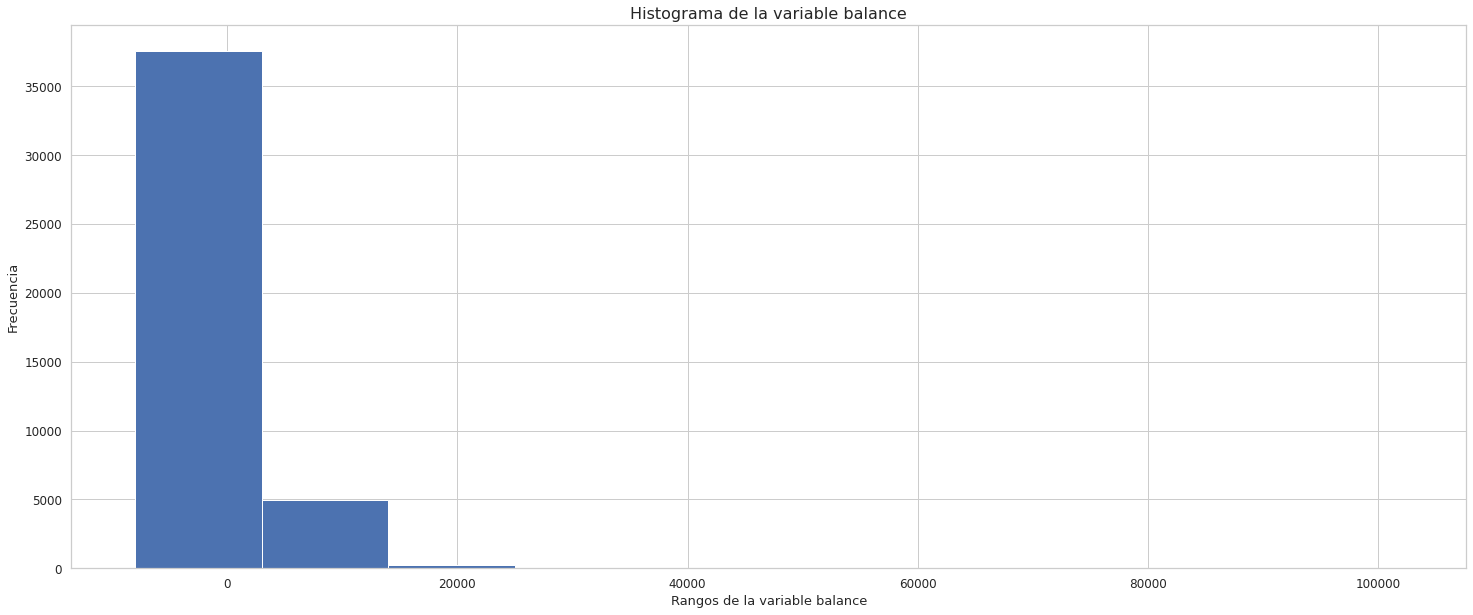

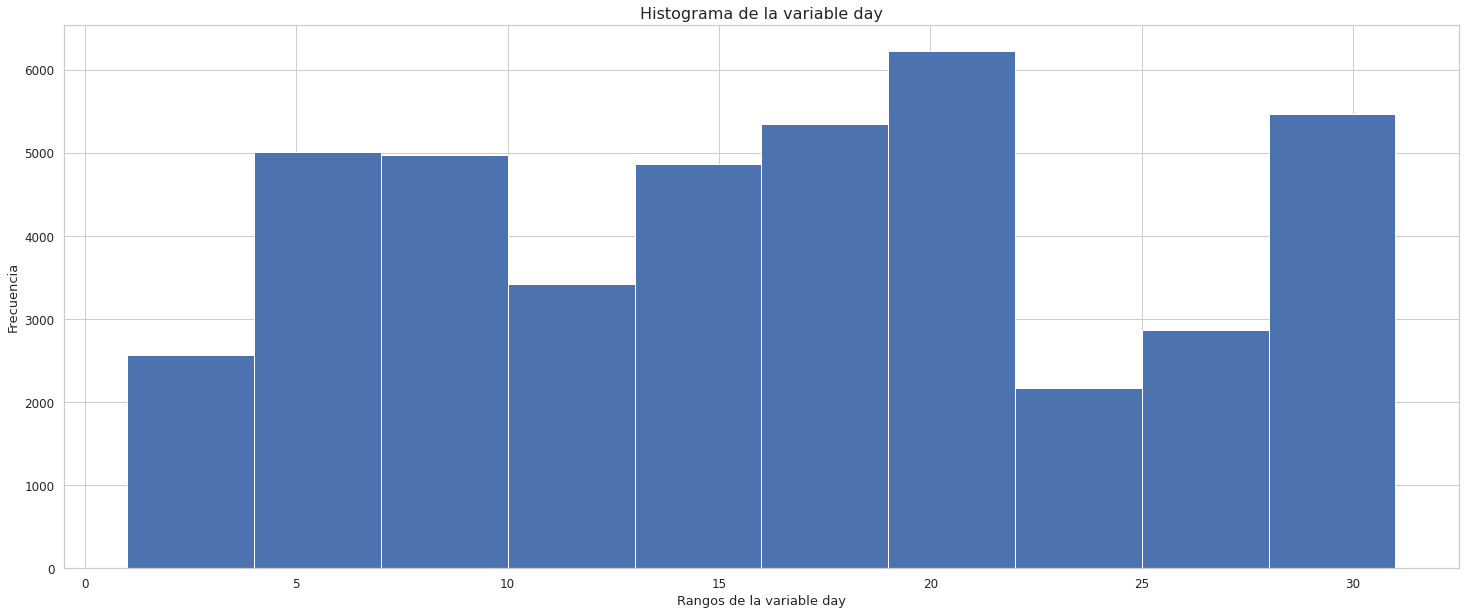

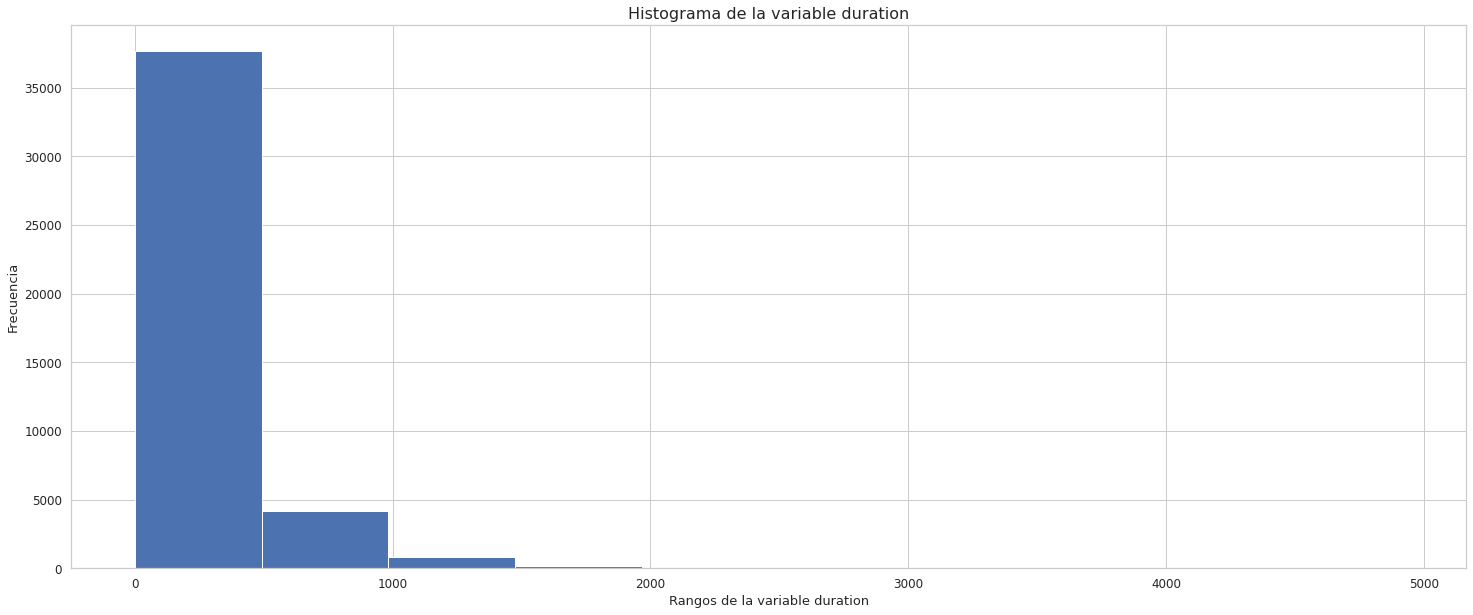

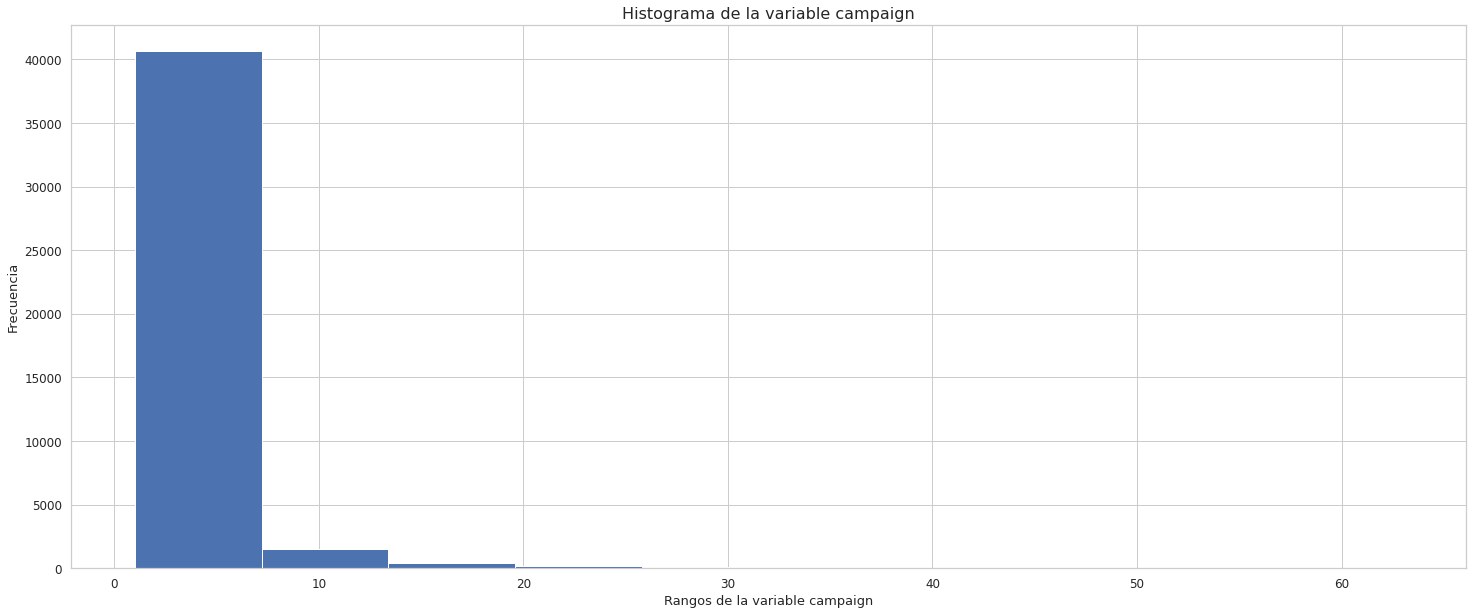

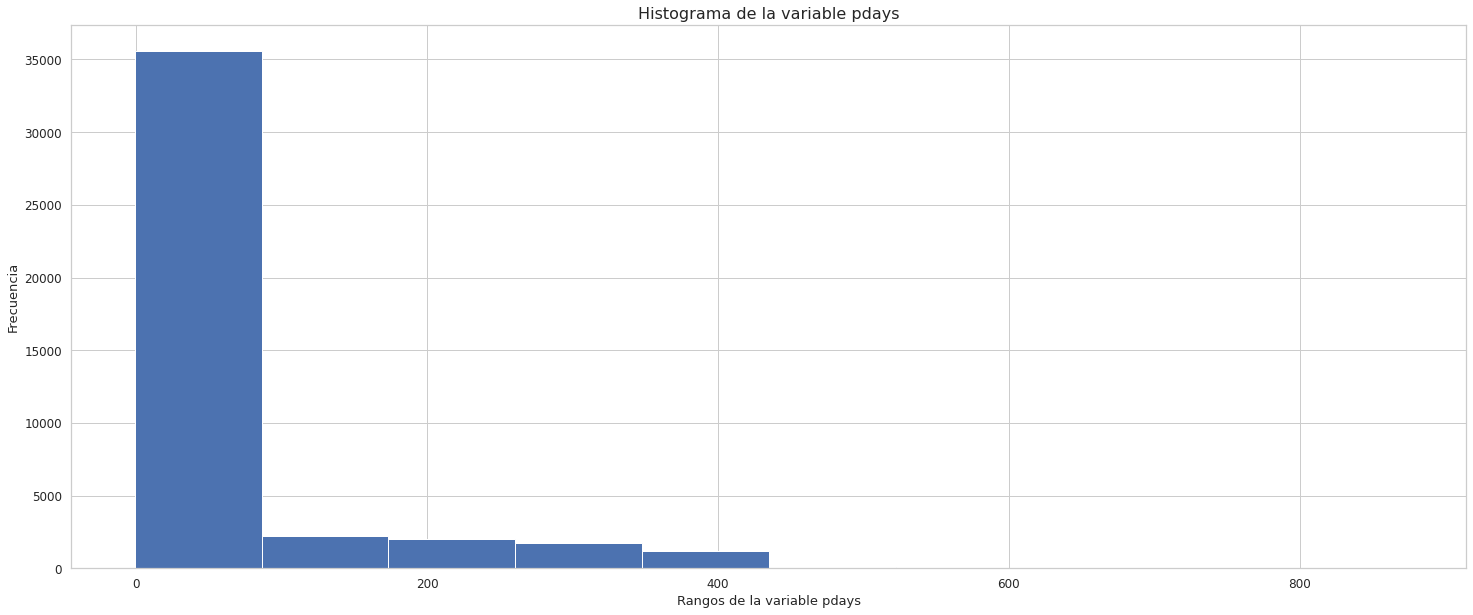

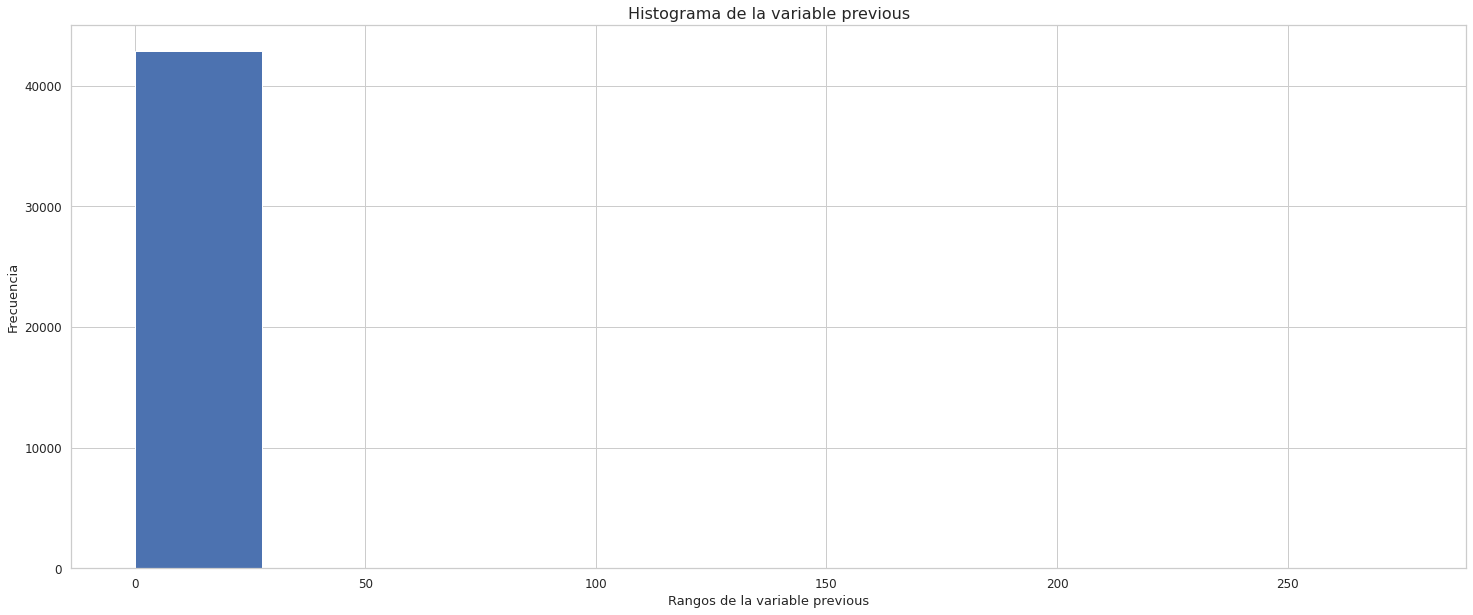

In [ ]:
# Se grafica los histogramas para cada variable
for i in df_cuantitativa.columns:

  plt.figure(figsize=(25, 10))
  plt.hist(df_cuantitativa[i])
  plt.title(f'Histograma de la variable {i}', fontsize = 16)
  plt.xlabel(f'Rangos de la variable {i}', fontsize = 13)
  plt.xticks(fontsize = 12, rotation = 0)
  plt.ylabel('Frecuencia', fontsize = 13)
  plt.yticks(fontsize = 12)
  plt.show()

  print('\n')

### Unir dataframe

In [ ]:
# Se unen los dataframe por su indice

df = df_cuantitativa.join(df_categoricas)
df.sample(10)

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
37799,24.0,608.0,14.0,184.0,1.0,-1.0,0.0,services,single,unknown,no,yes,no,cellular,may,nothing,no
20962,38.0,2454.0,14.0,373.0,2.0,-1.0,NaN,management,single,tertiary,no,yes,no,cellular,aug,nothing,no
17523,NaN,344.0,29.0,62.0,4.0,-1.0,0.0,blue-collar,single,primary,yes,nothing,yes,cellular,jul,nothing,no
41353,27.0,118.0,31.0,160.0,3.0,98.0,1.0,student,single,tertiary,no,no,no,cellular,aug,failure,yes
30343,30.0,566.0,5.0,110.0,1.0,-1.0,0.0,services,single,secondary,no,no,no,cellular,feb,nothing,no
2738,42.0,43.0,14.0,NaN,8.0,-1.0,0.0,management,married,secondary,no,yes,nothing,nothing,may,nothing,no
40170,30.0,NaN,5.0,366.0,1.0,-1.0,0.0,unemployed,single,tertiary,nothing,no,no,telephone,jun,nothing,nothing
29689,41.0,-78.0,3.0,69.0,4.0,252.0,4.0,management,divorced,tertiary,no,yes,no,cellular,feb,failure,no
99,46.0,229.0,5.0,197.0,1.0,-1.0,NaN,management,married,tertiary,no,yes,no,nothing,may,nothing,no
21345,45.0,1629.0,18.0,NaN,4.0,-1.0,0.0,technician,married,secondary,no,no,no,cellular,aug,nothing,no


## Imputación


En este apartado, se debe corroborar los datos faltantes del conjunto de datos y llenarlos usando una técnica de imputación simple.

In [ ]:
# Se instala la libreria de sklearn para realizar la imputación simple
from sklearn.impute import SimpleImputer

### Variables categoricas

In [ ]:
# Rellena los datos nothing por medio de la Moda

# Se instancia el imputador
imp = SimpleImputer(missing_values = 'nothing', strategy= 'most_frequent')

# Se entrena el imputador, generando un array con los valores a imputar (sustitutos)
imp.fit(df_categoricas)

# Se ejecuta la sustitución
df_categorica_imputacion_moda = imp.transform(df_categoricas)

# Se convierte de array a DataFrame y se asigna el indice como un id
nombres = df_categoricas.columns
df_categorica_imputacion_moda = pd.DataFrame(df_categorica_imputacion_moda, columns = nombres).reset_index()
df_categorica_imputacion_moda.head()

,index,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,0,management,married,tertiary,no,yes,no,cellular,may,failure,no
1,1,technician,single,secondary,no,yes,no,cellular,may,failure,no
2,2,entrepreneur,married,secondary,no,yes,yes,cellular,may,failure,no
3,3,blue-collar,married,unknown,no,yes,no,cellular,may,failure,no
4,4,blue-collar,single,unknown,no,no,no,cellular,may,failure,no


In [ ]:
df_categorica_imputacion_moda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   housing    45211 non-null  object
 6   loan       45211 non-null  object
 7   contact    45211 non-null  object
 8   month      45211 non-null  object
 9   poutcome   45211 non-null  object
 10  y          45211 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.8+ MB


### Variables cuantitativas

In [ ]:
# Rellena los datos NaN por medio del cálculo de la mediana

# Se crea objeto imputador
imp = SimpleImputer(missing_values = np.nan, strategy= 'median') 

# Se calcula valores a imputar y se reemplazan
df_cuantitativa_imputacion_mediana = imp.fit_transform(df_cuantitativa)

# Se convierte de array a DataFrame y se asigna el indice como un id
nombres = df_cuantitativa.columns
df_cuantitativa_imputacion_mediana = pd.DataFrame(df_cuantitativa_imputacion_mediana, columns = nombres).reset_index()
df_cuantitativa_imputacion_mediana.head(5)

,index,age,balance,day,duration,campaign,pdays,previous
0,0,58.0,2143.0,5.0,261.0,1.0,-1.0,0.0
1,1,44.0,29.0,5.0,151.0,1.0,-1.0,0.0
2,2,39.0,2.0,5.0,76.0,1.0,-1.0,0.0
3,3,47.0,1506.0,5.0,92.0,1.0,-1.0,0.0
4,4,33.0,1.0,5.0,198.0,1.0,-1.0,0.0


In [ ]:
df_cuantitativa_imputacion_mediana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     45211 non-null  int64  
 1   age       45211 non-null  float64
 2   balance   45211 non-null  float64
 3   day       45211 non-null  float64
 4   duration  45211 non-null  float64
 5   campaign  45211 non-null  float64
 6   pdays     45211 non-null  float64
 7   previous  45211 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 2.8 MB


In [ ]:
df_cuantitativa_imputacion_mediana.isnull().sum()

index       0
age         0
balance     0
day         0
duration    0
campaign    0
pdays       0
previous    0
dtype: int64

## Análisis de Datos Atípicos

En este apartado, se debe detectar los datos atípicos más relevantes de la base de datos, garantizando una estabilidad en la cantidad de información original de la base de datos. Es importante justificar la elección del algoritmo o método para detectar y remover datos atípicos, así como la elección o no de un método de escalamiento de datos antes de detectar datos atipicos.

In [ ]:
# Se trabaja sobre las variables cuantitativas excluyendo la variable index
df_cuantitativa_imputacion_mediana_aux = df_cuantitativa_imputacion_mediana[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
df_cuantitativa_imputacion_mediana_aux.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.838402,1310.887926,15.812634,254.203269,2.725111,38.184004,0.549866
std,10.367884,2949.283034,8.112309,251.936705,3.025519,98.052115,2.257433
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,87.000000,9.000000,107.000000,1.000000,-1.000000,0.000000
50%,39.000000,447.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1336.000000,21.000000,307.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Visualización de datos atípicos con diagramas de cajas e histogramas

In [ ]:
# Se visualiza los diagramas de caja para cada variable cuantitativa
for i in df_cuantitativa_imputacion_mediana_aux.columns:
  plt.figure(figsize=(25, 10))
  sns.boxplot(data = df_cuantitativa_imputacion_mediana_aux[i], linewidth = 3, palette="Set2", fliersize = 5)
  plt.title(f'Diagrama de cajas de la variable {i}', fontsize = 16)
  plt.xticks(fontsize = 12, rotation = 0)
  plt.ylabel('Valor', fontsize = 13)
  plt.yticks(fontsize = 12)
  plt.show()
  print('\n')

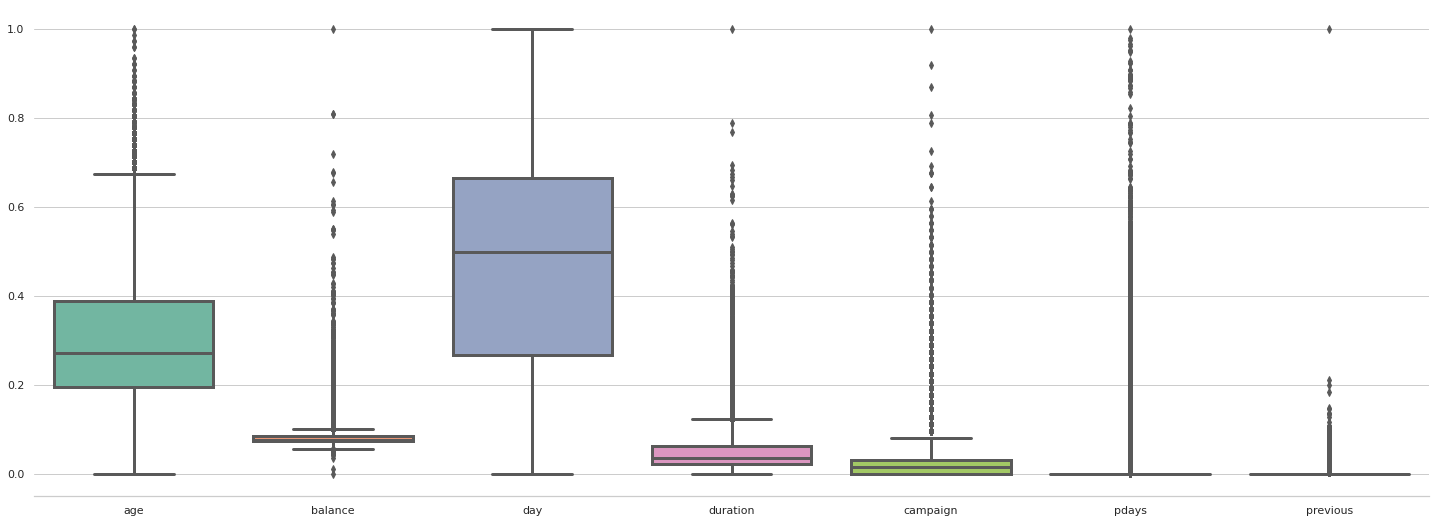

In [ ]:
# Diagrama de cajas normalizado

df_cuantitativa_imputacion_mediana_aux_normalizada = (df_cuantitativa_imputacion_mediana_aux - df_cuantitativa_imputacion_mediana_aux.min())/(df_cuantitativa_imputacion_mediana_aux.max() - df_cuantitativa_imputacion_mediana_aux.min()) 

# Se realiza el gráfico
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = df_cuantitativa_imputacion_mediana_aux_normalizada, linewidth = 3, 
            palette="Set2", fliersize = 5) # Diagrama Box Plot
sns.despine(left=True)

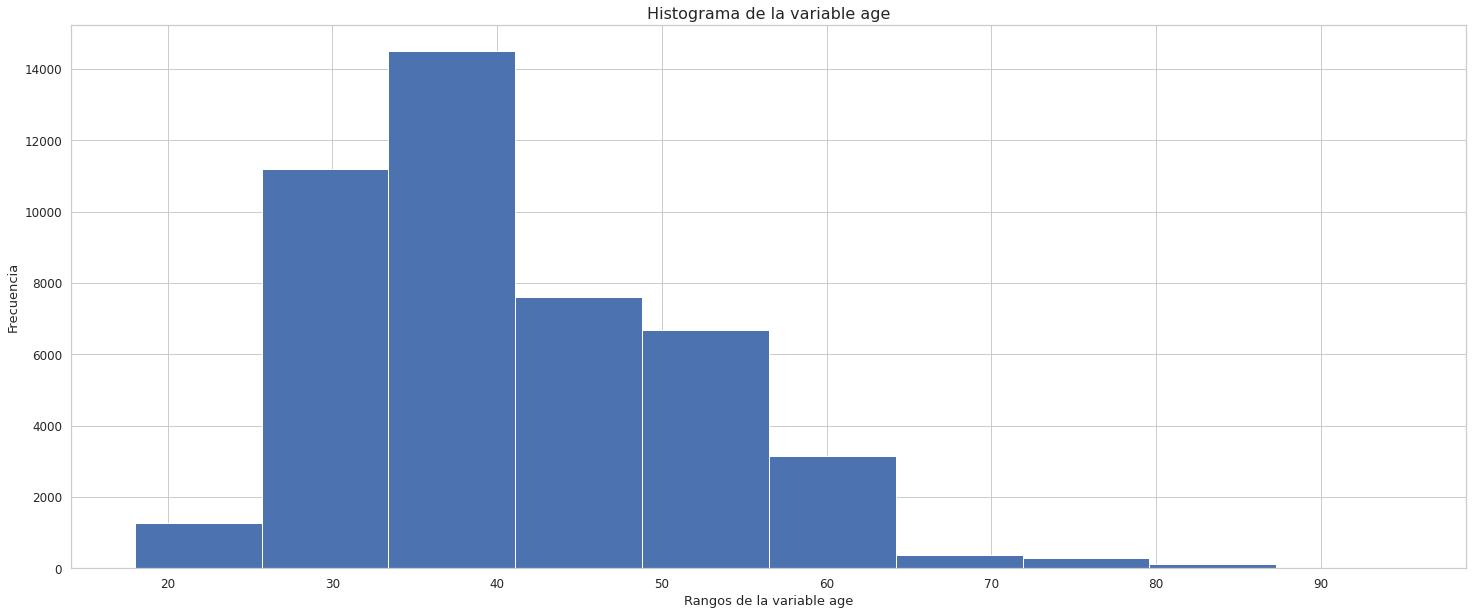

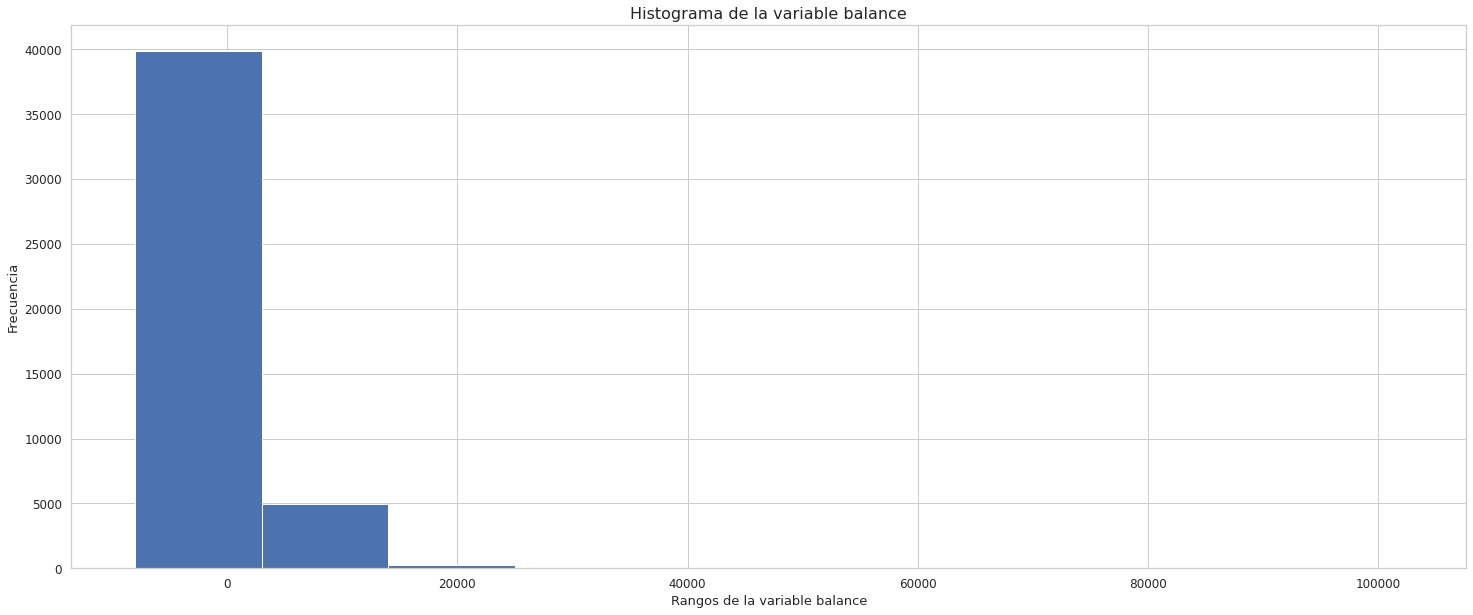

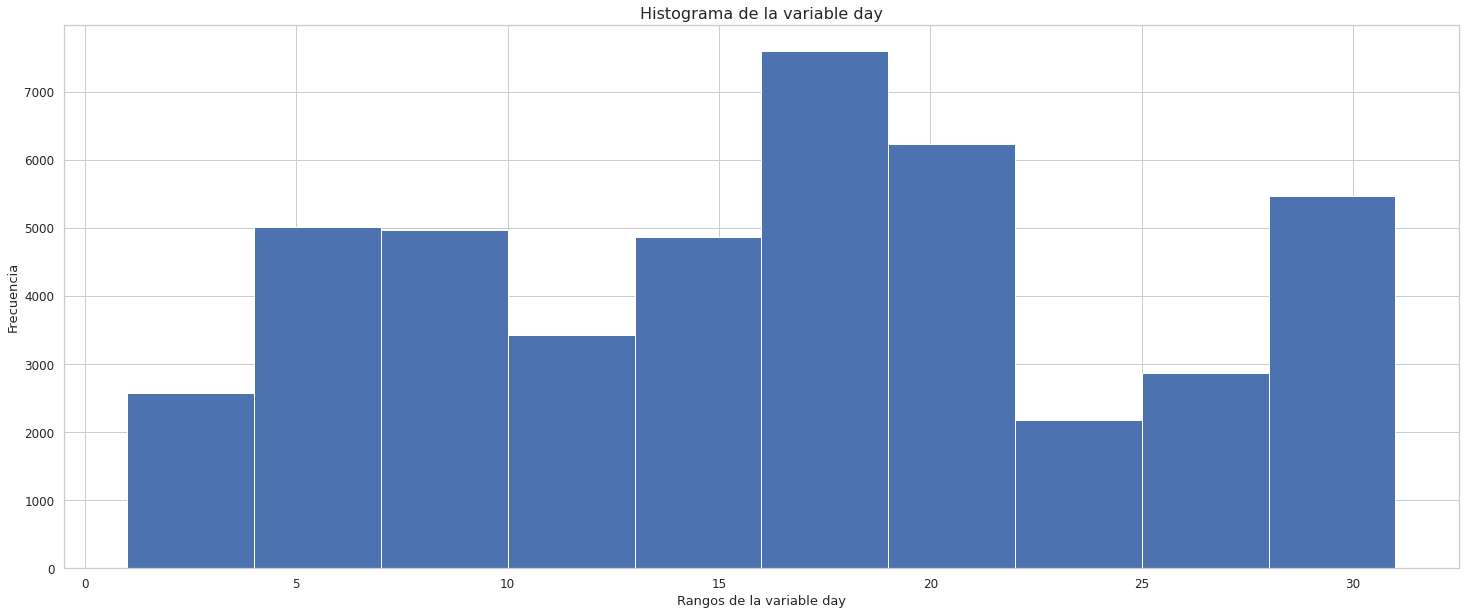

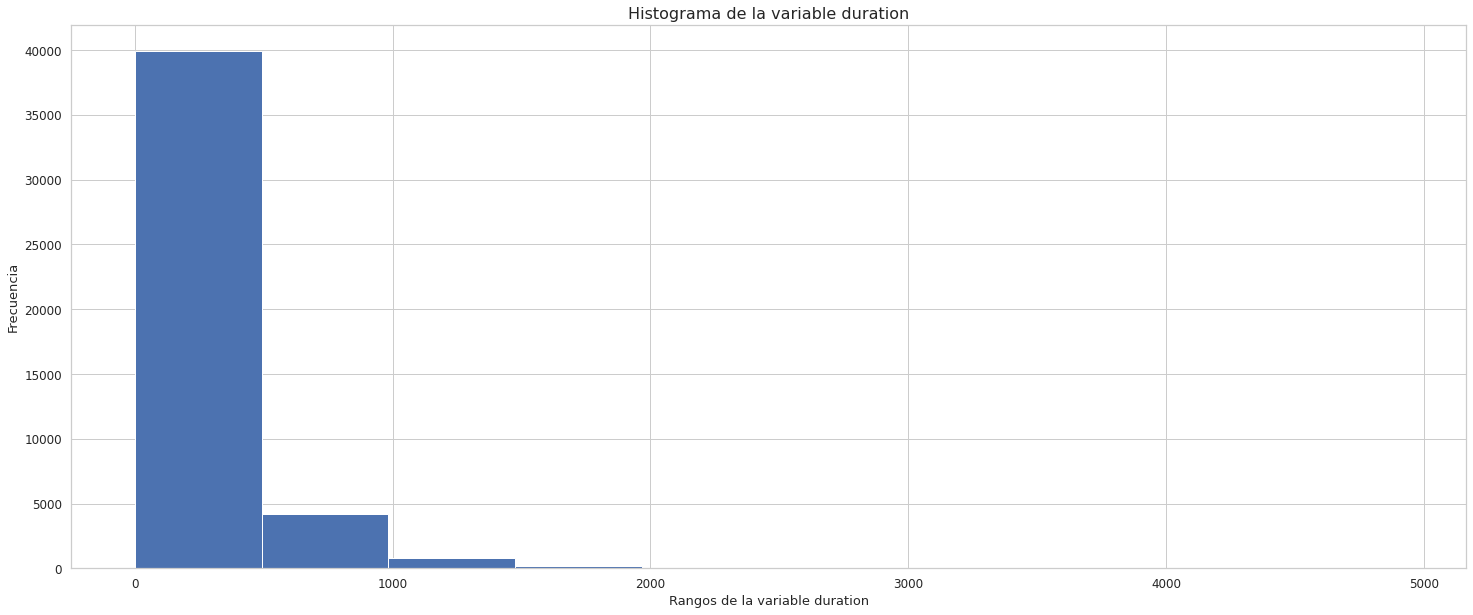

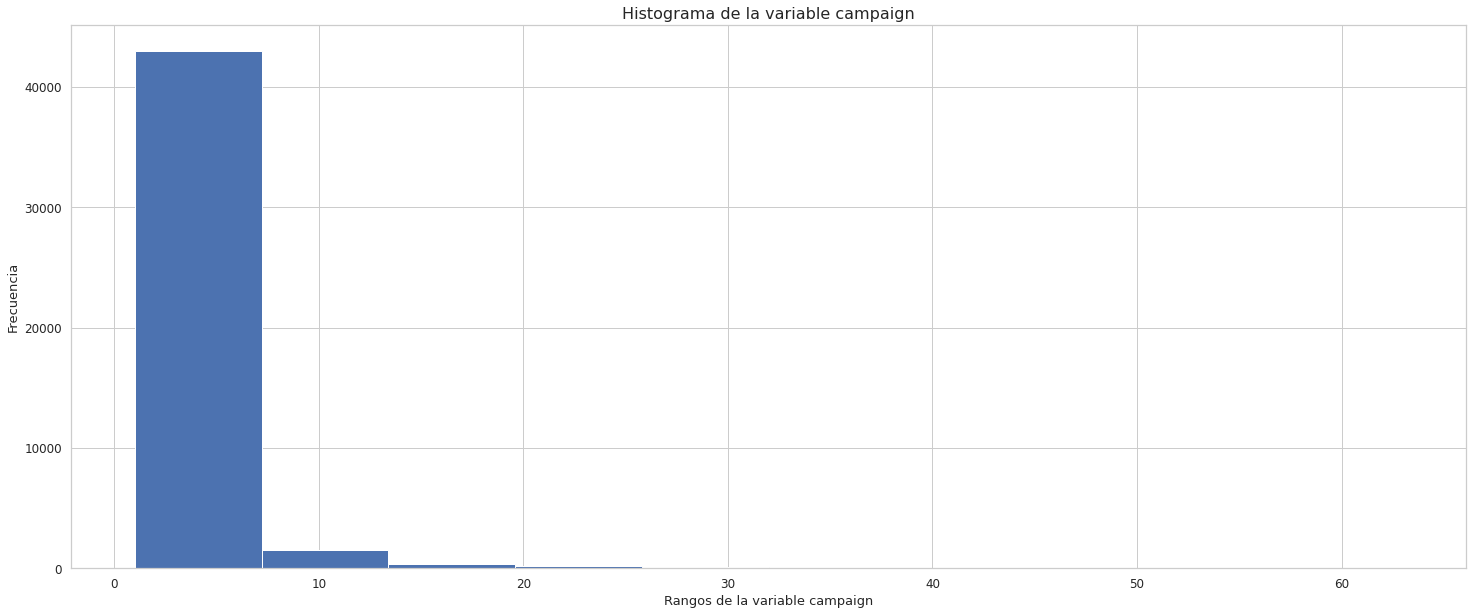

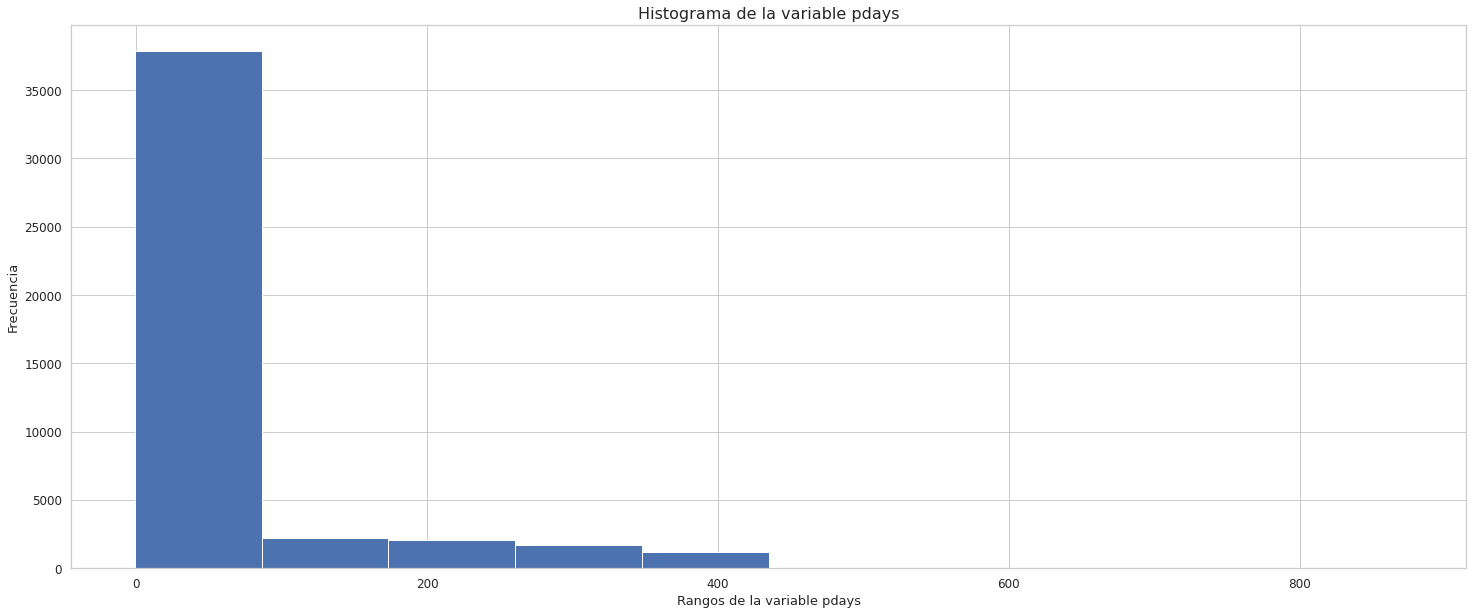

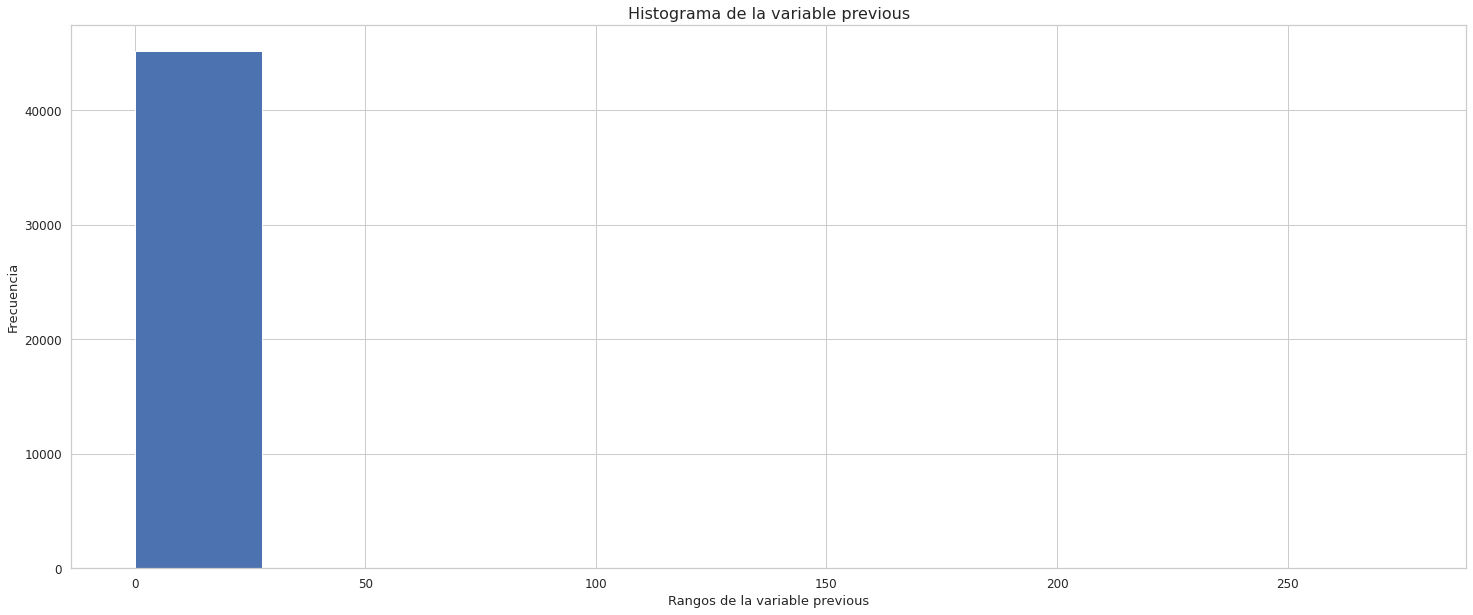

In [ ]:
# Se visualiza los histogramas para cada variable cuantitativa
for i in df_cuantitativa_imputacion_mediana_aux.columns:
  plt.figure(figsize=(25, 10))
  plt.hist(df_cuantitativa_imputacion_mediana_aux[i])
  plt.title(f'Histograma de la variable {i}', fontsize = 16)
  plt.xlabel(f'Rangos de la variable {i}', fontsize = 13)
  plt.xticks(fontsize = 12, rotation = 0)
  plt.ylabel('Frecuencia', fontsize = 13)
  plt.yticks(fontsize = 12)
  plt.show()

  print('\n')

### Prueba de los métodos

In [ ]:
from scipy.stats import median_abs_deviation 

mediana = np.median(df_cuantitativa_imputacion_mediana_aux, axis = 0)
MAD = median_abs_deviation(df_cuantitativa_imputacion_mediana_aux)

z_modificado = 0.6745*((df_cuantitativa_imputacion_mediana_aux - mediana)/MAD)
z_modificado.describe()

/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,7856.0,7838.0
mean,0.177143,1.321298,-0.021063,0.568751,0.489087,inf,inf
std,0.999020,4.510865,0.911959,1.931038,2.040712,NaN,NaN
min,-2.023500,-12.948565,-1.686250,-1.379659,-0.674500,inf,inf
25%,-0.578143,-0.550612,-0.786917,-0.559528,-0.674500,NaN,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.867214,1.359706,0.562083,0.973426,0.674500,NaN,NaN
max,5.396000,155.517370,1.686250,36.315693,41.144500,inf,inf


In [ ]:
media = np.mean(df_cuantitativa_imputacion_mediana_aux)
std = np.std(df_cuantitativa_imputacion_mediana_aux)

regla_desviacion = 3
z = (df_cuantitativa_imputacion_mediana_aux - media)/std
z.describe()

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,age,balance,day,duration,campaign,pdays,previous
count,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04
mean,2.313417e-16,-1.005833e-17,1.571615e-16,-3.268959e-17,2.514584e-17,-3.017500e-17,3.017500e-17
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-2.202827e+00,-3.163478e+00,-1.825966e+00,-1.009008e+00,-5.701932e-01,-3.996287e-01,-2.435830e-01
25%,-7.560355e-01,-4.149827e-01,-8.397991e-01,-5.842932e-01,-5.701932e-01,-3.996287e-01,-2.435830e-01
50%,-1.773190e-01,-2.929178e-01,2.309675e-02,-2.945347e-01,-2.396677e-01,-3.996287e-01,-2.435830e-01
75%,6.907559e-01,8.514731e-03,6.394509e-01,2.095658e-01,9.085777e-02,-3.996287e-01,-2.435830e-01
max,5.224036e+00,3.418364e+01,1.872159e+00,1.851198e+01,1.992239e+01,8.493700e+00,1.215775e+02


In [ ]:
from scipy.stats import iqr

IQR = iqr(df_cuantitativa_imputacion_mediana_aux, axis = 0, rng = (25, 75), interpolation = 'midpoint')

Q1 = np.percentile(df_cuantitativa_imputacion_mediana_aux, 25, axis = 0, interpolation = 'midpoint')
Q3 = np.percentile(df_cuantitativa_imputacion_mediana_aux, 75, axis = 0, interpolation = 'midpoint')

Min_Limite = Q1 - 1.5*IQR
Max_Limite = Q3 + 1.5*IQR

datos_atipicos_age = []
datos_atipicos_balance = []
datos_atipicos_days = []
datos_atipicos_duration = []
datos_atipicos_campaign = []
datos_atipicos_pdays = []
datos_atipicos_previous = []

pos_atipicos_age = []
pos_atipicos_balance = []
pos_atipicos_days = []
pos_atipicos_duration = []
pos_atipicos_campaign = []
pos_atipicos_pdays = []
pos_atipicos_previous = []

for n in range(df_cuantitativa_imputacion_mediana_aux.shape[0]):

  if df_cuantitativa_imputacion_mediana_aux.iloc[n,0] < Min_Limite[0] or df_cuantitativa_imputacion_mediana_aux.iloc[n,0] > Max_Limite[0]:
     datos_atipicos_age.append(df_cuantitativa_imputacion_mediana_aux.iloc[n,0])
     pos_atipicos_age.append(n)

  if df_cuantitativa_imputacion_mediana_aux.iloc[n,1] < Min_Limite[0] or df_cuantitativa_imputacion_mediana_aux.iloc[n,1] > Max_Limite[0]:
     datos_atipicos_balance.append(df_cuantitativa_imputacion_mediana_aux.iloc[n,0])
     pos_atipicos_balance.append(n)

  if df_cuantitativa_imputacion_mediana_aux.iloc[n,2] < Min_Limite[0] or df_cuantitativa_imputacion_mediana_aux.iloc[n,2] > Max_Limite[0]:
     datos_atipicos_days.append(df_cuantitativa_imputacion_mediana_aux.iloc[n,0])
     pos_atipicos_days.append(n)

  if df_cuantitativa_imputacion_mediana_aux.iloc[n,3] < Min_Limite[1] or df_cuantitativa_imputacion_mediana_aux.iloc[n,3] > Max_Limite[1]:
     datos_atipicos_duration.append(df_cuantitativa_imputacion_mediana_aux.iloc[n,1])
     pos_atipicos_duration.append(n)

  if df_cuantitativa_imputacion_mediana_aux.iloc[n,4] < Min_Limite[2] or df_cuantitativa_imputacion_mediana_aux.iloc[n,4] > Max_Limite[2]:
     datos_atipicos_campaign.append(df_cuantitativa_imputacion_mediana_aux.iloc[n,2])
     pos_atipicos_campaign.append(n)

  if df_cuantitativa_imputacion_mediana_aux.iloc[n,5] < Min_Limite[3] or df_cuantitativa_imputacion_mediana_aux.iloc[n,5] > Max_Limite[3]:
     datos_atipicos_pdays.append(df_cuantitativa_imputacion_mediana_aux.iloc[n,3])
     pos_atipicos_pdays.append(n)

  if df_cuantitativa_imputacion_mediana_aux.iloc[n,6] < Min_Limite[4] or df_cuantitativa_imputacion_mediana_aux.iloc[n,6] > Max_Limite[4]:
     datos_atipicos_previous.append(df_cuantitativa_imputacion_mediana_aux.iloc[n,4])
     pos_atipicos_previous.append(n)

Numero_datos_atipicos = [len(datos_atipicos_age), len(datos_atipicos_balance), len(datos_atipicos_days), len(datos_atipicos_duration), len(datos_atipicos_campaign), 
                         len(datos_atipicos_pdays), len(datos_atipicos_previous)]

reporte = pd.DataFrame(Numero_datos_atipicos, index = df_cuantitativa_imputacion_mediana_aux.columns, columns = ['Número de Datos Atípicos'])
reporte

<ipython-input-85-04bdbb626017>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df_cuantitativa_imputacion_mediana_aux, 25, axis = 0, interpolation = 'midpoint')
<ipython-input-85-04bdbb626017>:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df_cuantitativa_imputacion_mediana_aux, 75, axis = 0, interpolation = 'midpoint')


,Número de Datos Atípicos
age,465
balance,42484
day,13062
duration,8
campaign,12
pdays,48
previous,745


### Test z

In [ ]:
media = np.mean(df_cuantitativa_imputacion_mediana_aux)
std = np.std(df_cuantitativa_imputacion_mediana_aux)

regla_desviacion = 3
z = (df_cuantitativa_imputacion_mediana_aux - media)/std

datos_atipicos_age = []
datos_atipicos_balance = []
datos_atipicos_days = []
datos_atipicos_duration = []
datos_atipicos_campaign = []
datos_atipicos_pdays = []
datos_atipicos_previous = []

pos_atipicos_age = []
pos_atipicos_balance = []
pos_atipicos_days = []
pos_atipicos_duration = []
pos_atipicos_campaign = []
pos_atipicos_pdays = []
pos_atipicos_previous = []

for n in range(df_cuantitativa_imputacion_mediana_aux.shape[0]):
    if z.iloc[n,0] > regla_desviacion:
      datos_atipicos_age.append(df_cuantitativa_imputacion_mediana_aux.iloc[n,0])
      pos_atipicos_age.append(n)

    if z.iloc[n,1] > regla_desviacion:
      datos_atipicos_balance.append(df_cuantitativa_imputacion_mediana_aux.iloc[n,1])
      pos_atipicos_balance.append(n)

    if z.iloc[n,2] > regla_desviacion:
      datos_atipicos_days.append(df_cuantitativa_imputacion_mediana_aux.iloc[n,2])
      pos_atipicos_days.append(n)

    if z.iloc[n,3] > regla_desviacion:
      datos_atipicos_duration.append(df_cuantitativa_imputacion_mediana_aux.iloc[n,3])
      pos_atipicos_duration.append(n)

    if z.iloc[n,4] > regla_desviacion:
      datos_atipicos_campaign.append(df_cuantitativa_imputacion_mediana_aux.iloc[n,4])
      pos_atipicos_campaign.append(n)

    if z.iloc[n,5] > regla_desviacion:
      datos_atipicos_pdays.append(df_cuantitativa_imputacion_mediana_aux.iloc[n,5])
      pos_atipicos_pdays.append(n)

    if z.iloc[n,6] > regla_desviacion:
      datos_atipicos_previous.append(df_cuantitativa_imputacion_mediana_aux.iloc[n,6])
      pos_atipicos_previous.append(n)

Numero_datos_atipicos = [len(datos_atipicos_age), len(datos_atipicos_balance), len(datos_atipicos_days), len(pos_atipicos_duration),
                         len(datos_atipicos_campaign), len(datos_atipicos_pdays), len(datos_atipicos_previous)]

reporte = pd.DataFrame(Numero_datos_atipicos, index = df_cuantitativa_imputacion_mediana_aux.columns, columns = ['Número de Datos Atípicos'])
display(reporte) 

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,Número de Datos Atípicos
age,412
balance,751
day,0
duration,975
campaign,938
pdays,1834
previous,546


In [ ]:
Posiciones_coinciden = list(set(pos_atipicos_age) | set(pos_atipicos_balance) | set(pos_atipicos_duration) | set(pos_atipicos_campaign) | set(pos_atipicos_pdays) | set(pos_atipicos_previous))
print(Posiciones_coinciden)

[16390, 32775, 32786, 32787, 32793, 32798, 16415, 34, 32806, 43, 32817, 32818, 32822, 32823, 59, 16446, 32830, 32832, 16450, 32834, 69, 16454, 83, 32852, 32853, 86, 87, 16470, 32858, 16477, 16481, 32865, 32869, 32875, 32876, 16497, 16499, 32886, 32895, 16515, 32900, 16518, 16520, 32906, 32910, 32911, 32914, 16533, 152, 16537, 16540, 32929, 32936, 16553, 170, 32939, 182, 32950, 32954, 32963, 32965, 32966, 32977, 32979, 32983, 32986, 16604, 32991, 224, 32993, 33003, 33008, 33017, 16636, 16637, 16640, 33032, 33044, 33048, 33050, 33054, 33055, 33061, 33073, 16692, 33087, 33088, 33089, 33100, 334, 33105, 16726, 33113, 33114, 33115, 16732, 16742, 16744, 33129, 33137, 33138, 16758, 33143, 33148, 33149, 33152, 33155, 388, 16772, 390, 33160, 33165, 33169, 33172, 33173, 33175, 16796, 33195, 16816, 33200, 33213, 446, 16830, 33218, 16839, 16842, 16847, 16855, 474, 33243, 33245, 16864, 16865, 33254, 33263, 16880, 33264, 16883, 33270, 33279, 33284, 33294, 33296, 33300, 16922, 16926, 33312, 33329, 33

In [ ]:
df_cuantitativa_imputacion_mediana_sin_atipicos = df_cuantitativa_imputacion_mediana.drop(Posiciones_coinciden)
print(f'Total de registro antes de la eliminación de atipicos en las variables cuantitativas: {df_cuantitativa_imputacion_mediana.shape[0]}')
print(f'Total de registro después de la eliminación de atipicos en las variables cuantitativas: {df_cuantitativa_imputacion_mediana_sin_atipicos.shape[0]}')

Total de registro antes de la eliminación de atipicos en las variables cuantitativas: 45211
Total de registro después de la eliminación de atipicos en las variables cuantitativas: 39995


In [ ]:
df_categorica_imputacion_moda_sin_atipicos = df_categorica_imputacion_moda.drop(Posiciones_coinciden)
print(f'Total de registro antes de la eliminación de atipicos en las variables categorias: {df_categorica_imputacion_moda.shape[0]}')
print(f'Total de registro después de la eliminación de atipicos en las variables categorias: {df_categorica_imputacion_moda_sin_atipicos.shape[0]}')

Total de registro antes de la eliminación de atipicos en las variables categorias: 45211
Total de registro después de la eliminación de atipicos en las variables categorias: 39995


## Análisis Estadístico

En este apartado, los datos filtrados de la sección anterior (Análisis de Datos Atípicos) deben ser analizados mediante test estadísticos de acuerdo al tipo de variable (cualitativo, cuantitativo, etc...). Determinar si los datos siguen una determinada distribución de probabilidad y si hay o no correlacción entre las variables.

In [ ]:
from scipy.special import entr # Entropía de Shannon

H_1 = entr(df_cuantitativa_imputacion_mediana[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']])
H_2 = entr(df_cuantitativa_imputacion_mediana_sin_atipicos[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']])

entropia_normalizada_1 = H_1.sum()/df_cuantitativa_imputacion_mediana.shape[0]
entropia_normalizada_2 = H_2.sum()/df_cuantitativa_imputacion_mediana_sin_atipicos.shape[0]

entropia_normalizada_1 = pd.DataFrame(entropia_normalizada_1, index = None, columns = ['Entropia Original'])
entropia_normalizada_2 = pd.DataFrame(entropia_normalizada_2, index = None, columns = ['Entropia Z'])
Comparacion_entropias = pd.concat([entropia_normalizada_1, entropia_normalizada_2], axis = 1)
Comparacion_entropias['% diff'] = np.abs(100 * (Comparacion_entropias['Entropia Original'] - Comparacion_entropias['Entropia Z'])/Comparacion_entropias['Entropia Original'])


display(Comparacion_entropias)

,Entropia Original,Entropia Z,% diff
age,-152.769401,-151.271257,0.980657
balance,-inf,-inf,NaN
day,-45.947239,-46.011049,0.138877
duration,-1497.503355,-1323.775044,11.601197
campaign,-3.700062,-2.668855,27.869993
pdays,-inf,-inf,NaN
previous,-0.854116,-0.364046,57.377422


### Variables categoricas

In [ ]:
df_categorica_imputacion_moda_sin_atipicos_aux = df_categorica_imputacion_moda_sin_atipicos[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']]

In [ ]:
# Se grafica la distribuión de las categorias para cada variable
for i in df_categorica_imputacion_moda_sin_atipicos_aux.columns:

  # Se convierte a porcentaje la frecuencia de cada categoría por variable
  df_aux = dict(100 * df_categorica_imputacion_moda_sin_atipicos_aux[i].value_counts()/len(df_categorica_imputacion_moda_sin_atipicos_aux[i]))

  plt.figure(figsize=(25, 10))
  plt.bar(df_aux.keys(), df_aux.values())
  plt.title(f'Porcentaje de datos de las categorias de la variable {i}', fontsize = 16)
  plt.xlabel(f'Categorias de la variable {i}', fontsize = 13)
  plt.xticks(fontsize = 12, rotation = 0)
  plt.ylabel('%', fontsize = 13)
  plt.yticks(fontsize = 12)
  plt.show()

  print('\n')

### Variables cuantativas

In [ ]:
df_cuantitativa_imputacion_mediana_sin_atipicos_aux = df_cuantitativa_imputacion_mediana_sin_atipicos[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]

In [ ]:
# Correlación númerica de las variables cuantitativas
df_cuantitativa_imputacion_mediana_sin_atipicos_aux.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.085493,-0.010293,-0.027529,0.037007,-0.006658,0.005419
balance,0.085493,1.000000,0.011375,0.026900,-0.013562,0.043387,0.052784
day,-0.010293,0.011375,1.000000,-0.023461,0.121314,-0.055332,-0.048367
duration,-0.027529,0.026900,-0.023461,1.000000,-0.074838,0.011407,0.015657
campaign,0.037007,-0.013562,0.121314,-0.074838,1.000000,-0.081058,-0.059400
pdays,-0.006658,0.043387,-0.055332,0.011407,-0.081058,1.000000,0.678517
previous,0.005419,0.052784,-0.048367,0.015657,-0.059400,0.678517,1.000000


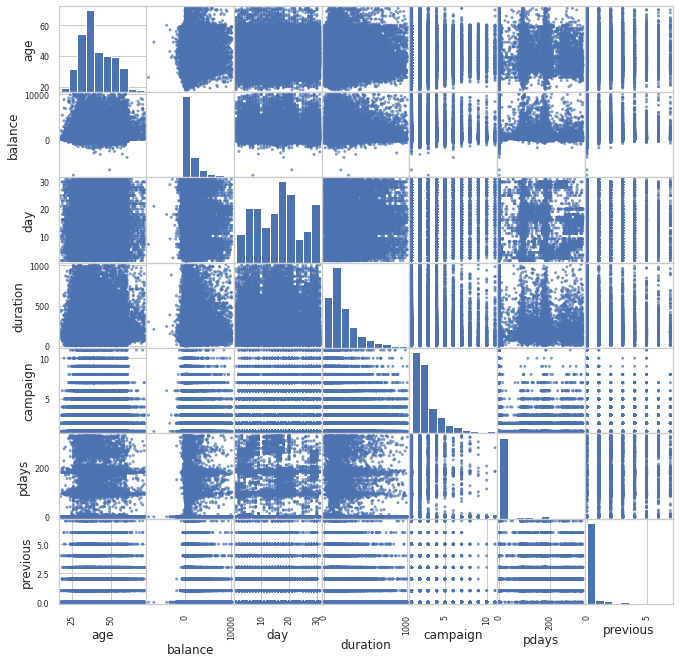

In [ ]:
# Correlación grafica de las variables cuantitativas
pd.plotting.scatter_matrix(df_cuantitativa_imputacion_mediana_sin_atipicos_aux, alpha=0.7, figsize=(11,11))
plt.show()

In [ ]:
# Se grafica los histogramas para cada variable
for i in df_cuantitativa_imputacion_mediana_sin_atipicos_aux.columns:
  plt.figure(figsize=(25, 10))
  plt.hist(df_cuantitativa_imputacion_mediana_sin_atipicos_aux[i])
  plt.title(f'Histograma de la variable {i}', fontsize = 16)
  plt.xlabel(f'Rangos de la variable {i}', fontsize = 13)
  plt.xticks(fontsize = 12, rotation = 0)
  plt.ylabel('Frecuencia', fontsize = 13)
  plt.yticks(fontsize = 12)
  plt.show()

  print('\n')

In [ ]:
# Se muestra el boxplot de las cada variable cuantitativa
for i in df_cuantitativa_imputacion_mediana_sin_atipicos_aux.columns:
  plt.figure(figsize=(25, 10))
  sns.boxplot(data = df_cuantitativa_imputacion_mediana_sin_atipicos_aux[i], linewidth = 3, palette="Set2", fliersize = 5)
  plt.title(f'Diagrama de cajas de la variable {i}', fontsize = 16)
  plt.xticks(fontsize = 12, rotation = 0)
  plt.ylabel('Valor', fontsize = 13)
  plt.yticks(fontsize = 12)
  plt.show()
  print('\n')

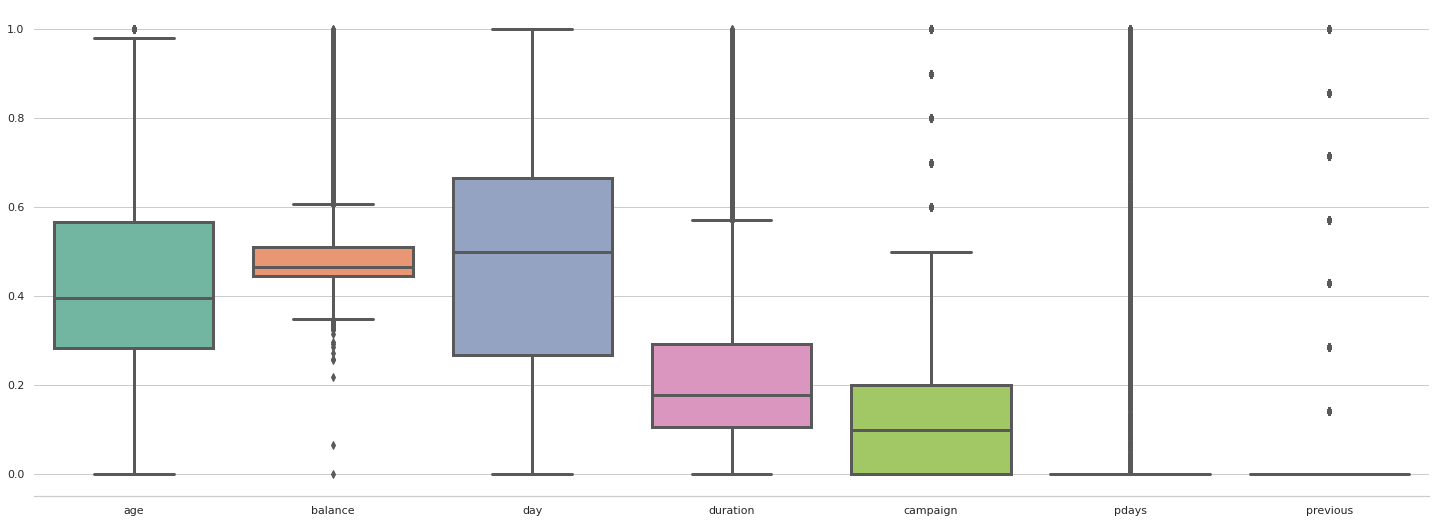

In [ ]:
# Diagrama de cajas normalizado

df_cuantitativa_imputacion_mediana_sin_atipicos_aux_normalizada = (df_cuantitativa_imputacion_mediana_sin_atipicos_aux - df_cuantitativa_imputacion_mediana_sin_atipicos_aux.min())/(df_cuantitativa_imputacion_mediana_sin_atipicos_aux.max() - df_cuantitativa_imputacion_mediana_sin_atipicos_aux.min()) 

# Se realiza el gráfico
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = df_cuantitativa_imputacion_mediana_sin_atipicos_aux_normalizada, linewidth = 3, 
            palette="Set2", fliersize = 5) # Diagrama Box Plot
sns.despine(left=True)

## Escalamiento

En este apartado, se realizará un proceso de escalamiento a las columnas del conjunto de datos. Primero, grafique diagramas de cajas para visualizar la distribución de los datos. ¿Cuál es la columna con mayor cantidad de outliers? Justifique cuál es el mejor método de escalamiento en este caso.



In [ ]:
from sklearn.preprocessing import MinMaxScaler

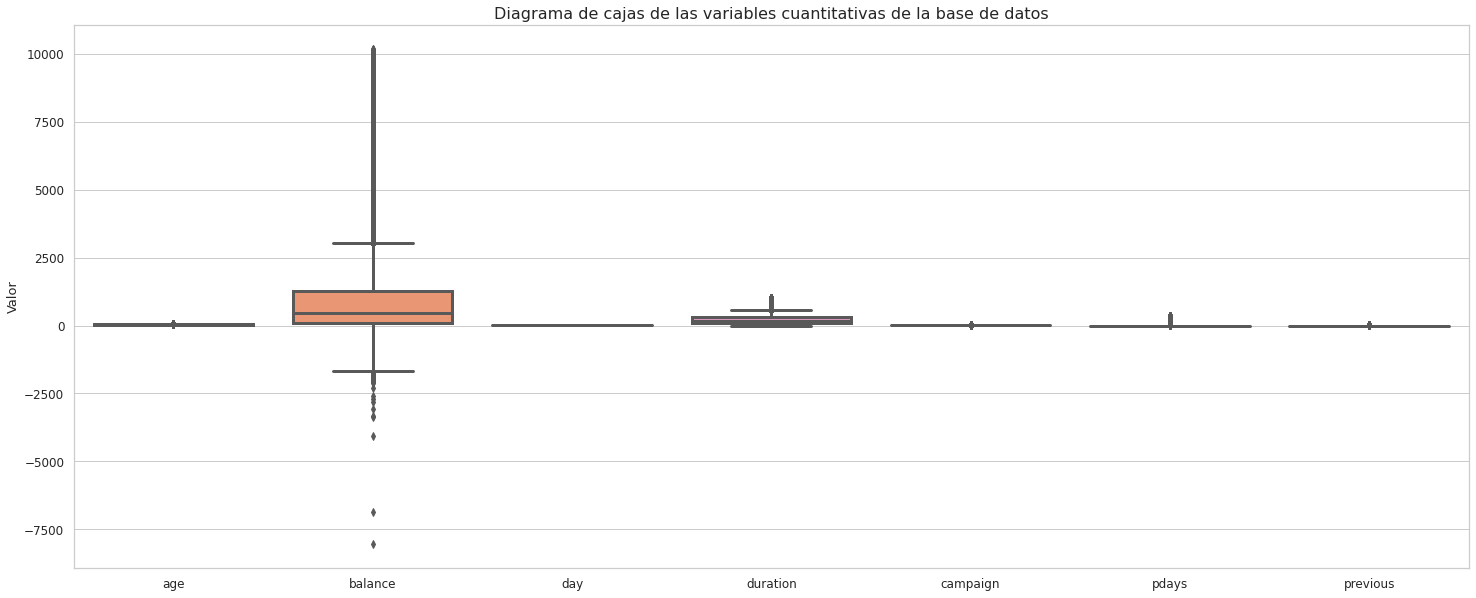

In [ ]:
# Se visualiza los diagramas de caja
plt.figure(figsize=(25, 10))
sns.boxplot(data = df_cuantitativa_imputacion_mediana_sin_atipicos_aux, linewidth = 3, palette="Set2", fliersize = 5)
plt.title(f'Diagrama de cajas de las variables cuantitativas de la base de datos', fontsize = 16)
plt.xticks(fontsize = 12, rotation = 0)
plt.ylabel('Valor', fontsize = 13)
plt.yticks(fontsize = 12)
plt.show()

In [ ]:
MinMax_1 = MinMaxScaler(copy=True, feature_range=(0, 1)) # Método MinMax con valores entre 0 y 1
data_Min_Max = MinMax_1.fit_transform(df_cuantitativa_imputacion_mediana_sin_atipicos_aux) # Transformación de los nuevos datos con una escala MinMax
df_cuantitativa_imputacion_mediana_sin_atipicos_escalado_aux = pd.DataFrame(data = data_Min_Max, columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'])

In [ ]:
df_cuantitativa_imputacion_mediana_sin_atipicos_escalado_aux.sample(5)

,age,balance,day,duration,campaign,pdays,previous
4439,0.396226,0.421386,0.633333,0.143564,0.1,0.000000,0.000000
35565,0.226415,0.497826,0.866667,0.134653,0.1,0.345345,0.142857
29064,0.490566,0.467888,0.166667,0.204950,0.1,0.600601,0.857143
20745,0.509434,0.464972,0.666667,0.138614,0.1,0.000000,0.000000
24161,0.415094,0.535304,0.600000,0.378218,0.1,0.525526,0.142857


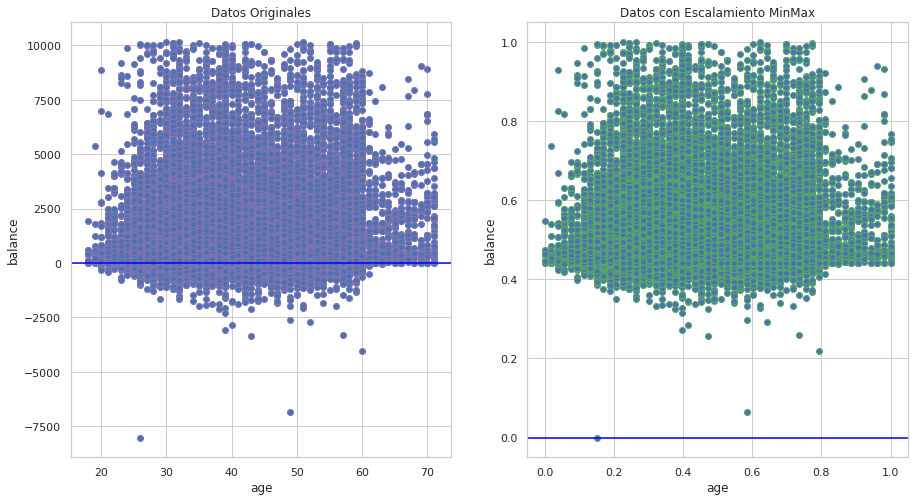

In [ ]:
fig = plt.figure(figsize=(15,8)) # Se define el tamaño de la figura en ancho y altura    
    
ax = fig.add_subplot(1, 2, 1)   
ax.scatter(df_cuantitativa_imputacion_mediana_sin_atipicos_aux['age'], df_cuantitativa_imputacion_mediana_sin_atipicos_aux['balance'], edgecolors="m")
plt.axhline(0, color="blue")
plt.title('Datos Originales')
plt.xlabel('age')
plt.ylabel('balance') # Etiqueta del eje y

ax = fig.add_subplot(1, 2, 2) 
ax.scatter(df_cuantitativa_imputacion_mediana_sin_atipicos_escalado_aux['age'], df_cuantitativa_imputacion_mediana_sin_atipicos_escalado_aux['balance'], edgecolors="g")
plt.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
plt.title('Datos con Escalamiento MinMax') # Titulo de la gráfica
plt.xlabel('age') # Etiqueta del eje x
plt.ylabel('balance') # Etiqueta del eje y

plt.show()

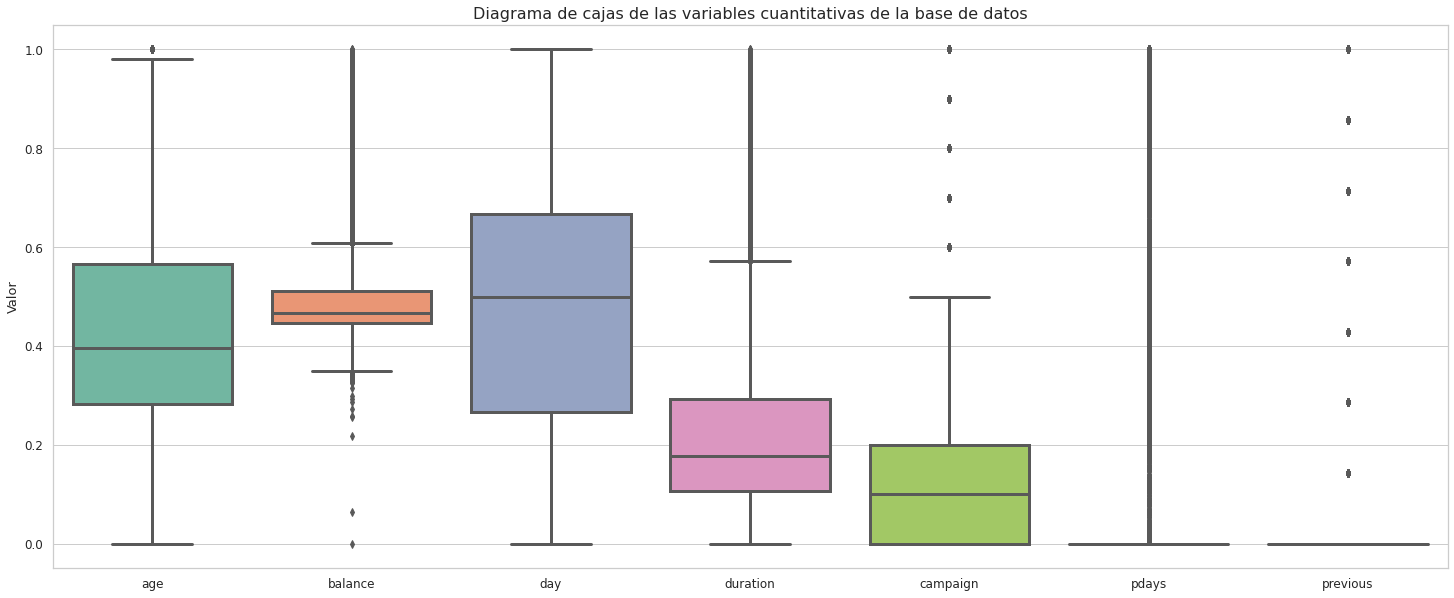

In [ ]:
# Se visualiza los diagramas de caja con los datos normalizados
plt.figure(figsize=(25, 10))
sns.boxplot(data = df_cuantitativa_imputacion_mediana_sin_atipicos_escalado_aux, linewidth = 3, palette="Set2", fliersize = 5)
plt.title(f'Diagrama de cajas de las variables cuantitativas de la base de datos', fontsize = 16)
plt.xticks(fontsize = 12, rotation = 0)
plt.ylabel('Valor', fontsize = 13)
plt.yticks(fontsize = 12)
plt.show()